## Algoritmos e Estrutura de Dados (AED) - Trabalho Final
### Problema: Minimum Vertex Cover (MVC)
__Grupo:__ <br>
Denise Soares Magalhães; <br>
João Laterza; <br>
Lucas Kuniyoshi. <br>

Brasília, 26 de março de 2021 <br>

___

#### 1) Minimum Vertex Cover (MVC)

Na matemática, na disciplina de teoria dos grafos, uma cobertura de vertices de um grafo é um conjunto de vértices tal que cada aresta do grafo é incidente a pelo menos um vértice do conjunto. Ou seja, É um conjunto de vértices que contém pelo menos uma das pontas de cada aresta. Em outras palavras, uma cobertura de vértices é um conjunto V de vértices dotado da seguinte propriedade: toda aresta do grafo tem pelo menos uma ponta em V.

O problema de encontrar uma cobertura de vértices mínima é um clássico problema de otimização em ciência da computação e é um exemplo típico de um problema de otimização NP-difícil que tem um algoritmo de aproximação. Esta versão de problema de decisão, o problema da cobertura de vértices, foi um dos 21 problemas NP-completos de Karp e, portanto, um problema NP-completo clássico da teoria da complexidade computacional. Além disso, o problema de cobertura de vértices é tratável em parâmetros fixos e um problema central na teoria da complexidade parametrizada.

Uma cobertura de vértices mínima é uma cobertura de vértice de menor tamanho possível. O número de cobertura de vértice τ é o tamanho de uma cobertura de vértices mínima. A figura a seguir mostra exemplos de coberturas de vértices mínima, em dois grafos

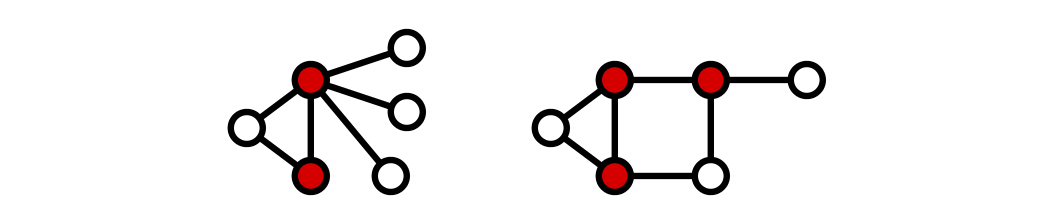

Fonte: https://pt.wikipedia.org/wiki/Cobertura_de_v%C3%A9rtices_(teoria_dos_grafos)

#### 2) Pacotes necessários

In [321]:
#Importa uma função que permite clonar um objeto
import copy

#Importa da biblioteca collections uma sub-classe do dicionário que retorna um objeto tipo dicionário
from collections import defaultdict

#Importa a biblioteca time com ferramentas para manipulação de dados temporais
import time

#Importa uma biblioteca com ferramentas para trabalhar com grafos
import networkx as nx

#importa o módulo de plotagem da biblioteca matplotlib
import matplotlib.pyplot as plt

#importa a biblioteca gráfica seaborn
import seaborn as sns

#importa o módulo de gráficos da biblioteca estatística statsmodels
from statsmodels.graphics import utils

#importa diversas funções de aleatoriedade da biblioteca random
from random import random, seed, choice, shuffle

#importa a biblioteca de funções matemáticas do python
import math

#importa a biblioteca numpy para trabalhar com vetores e matrizes
import numpy as np

#importa a biblioteca pandas para trabalhar com dataframes
import pandas as pd

#importa diversas funções estatísticas da biblioteca scipy
import scipy.stats as st

#importa a biblioteca os para efetuar comandos no sistema operacional da máquina
import os

#### 3) Algoritmo exato

Referência: Busca em Profundidade (DFS)

Uma forma direta de resolver o problema MVC de um grafo G é remover vértices iterativamente e verificar a cada remoção se o grafo resultante 'G' ainda satisfaz o conceito de Vertex Cover (VC). Na última iteração, i.e., quando todas as combinações já foram testadas, o conjunto de grafos VC de menor quantidade de vértice é a resposta para o MVC. Uma maneira de realizar estas iterações é através de Busca em Profundidade (Depth-First Search - DFS). Como mostra a figura, o processo pode ser ilustrado como uma árvore de decisão.

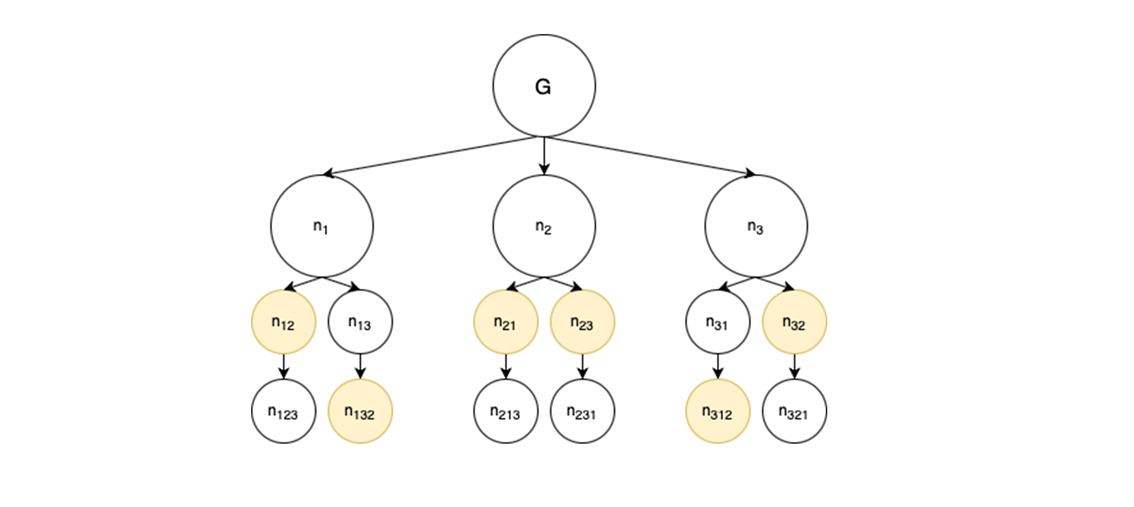

__3.1) Código do algoritmo exato__

O algoritmo abaixo fornece os passos para a obtenção do MVC. Sendo sua entrada um grafo 'G', com 'V' vértices. O algoritmo, a cada iteração, lista o grafo modificado de 'G', que é VC do mesmo, se este tiver tamanho menor ou igual dos grafos já listados. Pode-se reparar que no pior cenário, esta iteração terá O(p(n)*n!), sendo o p(n) função polinomial para comparar se os grafos modificados de G é VC, emitir certificados e verificar se o grafo resultante é menor que os grafos já listados. Já a parte fatorial resulta da busca por todas as possibilidades de combinações.

In [2]:
#Criação da classe grafo
class graph:
    def __init__(self, vert):
        """Dado um número inteiro k
        Cria um objeto grafo com k vértices
        Também cria dois objetos tipo dicionário
        Um será mantido inalterado (NC - No Change)"""
        self.V = vert
        self.graph = defaultdict(list)
        self.graphNC = defaultdict(list)

    def addEdge(self, vert1, vert2):
        """Dado dois inteiros vert1 e vert2
        Insere nos dois objetos tipo dicionário (graph e graphNC)
        os vertices (vert1 e vert2) que compõe a aresta"""
        #a key do dcionário será o vertice
        #os values são os vertices adjacentes que conectam com o vertice key
        self.graph[vert1].append(vert2)
        self.graph[vert2].append(vert1)
        self.graphNC[vert1].append(vert2)
        self.graphNC[vert2].append(vert1)

    def dropVert(self, key):
        """Dado um inteiro keys
        Retira um vértice (key) do dicionário graph e suas conectividades"""
        self.graph.pop(key)
        return self

    def analyseEdge(self, boolean):
        """Aplicado em um grafo:
        Dado um boleano (TRUE ou FALSO)
        Retorna uma lista de tuplas de vertices
        que representam cada aresta (Distinto)
        Se boleano FALSO, usa o grafo modificado (graph)
        Se boleano TRUE usa o grafo não modificado (graphNC)"""
        graphSelect = self.graph.items() if boolean == True else self.graphNC.items()
        check = True
        listConn = []
        for key, value in graphSelect:
            for vert in value:
                check = True
                for item in listConn:
                    if item == {key, vert} or item == {vert, key}:
                        check = False
                if check:
                    listConn.append({key, vert})
        return listConn

def verifyVC(graphV):
    """Dado um grafo
    Retorna um boleano e um lista (certificado)

    Para cada item da tupla de vertice do grafo modificado
        Verifica se existe a mesma tupla no grafo não modificado
            Se todos as tuplas são achada é VC e retorna Verdadeiro
            Se há ao menos uma tupla não encontrada retorna FALSO"""
    cover = []
    aux = 0
    for item in graphV.analyseEdge(False):
        for itemNC in graphV.analyseEdge(True):
            if item == itemNC:
                aux = 1
                break
            else:
                aux = 0
        cover.append(aux)
    vertexCover = True if sum(cover) == len(graphV.analyseEdge(False)) else False
    return vertexCover, cover

def MVC (otherGraph):
    """Dado um grafo qualquer
    Retorna uma lista com os possíveis MVCs do grafo

    Verifica se o grafo qualquer é um VC do seu grafo original
        Sim - Verifica se é a primeira recursão do grafo
            Se sim armazena o grafo na lista de possível MVC
            Se não verifica se o VC (atual) encontrado é menor que o primeiro item da lista de MVC
                Se sim limpa a lista e adiciona o novo VC
                Se não verifica se o tamanho do VC(atual) é igual ao primeiro item da lista
                    Adiciona o VC atual na lista se ele já não estiver nela
            Para cada vértice no grafo qualquer
                Clona o grafo qualquer e retira o primeiro vértice - DFS
                Aplica o MVC novamente no clone"""
    global firstTime
    global listing
    global count
    contain = False
    if verifyVC(otherGraph)[0]:
        if firstTime:
            listing.append(otherGraph.graph)
            firstTime = False
        else:
            if len(otherGraph.graph.keys())<len(listing[0].keys()):
                listing.clear()
                listing.append(otherGraph.graph)
            elif len(otherGraph.graph.keys())==len(listing[0].keys()):
                for item in listing:
                    if dict(item) == dict(otherGraph.graph):
                        contain = True
                        break
                    else:
                        contain = False
                if not contain:
                    listing.append(otherGraph.graph)
        for key in otherGraph.graph:
            count += 1
            operatingGraph = copy.deepcopy(otherGraph)
            MVC(operatingGraph.dropVert(key))

count = 0
firstTime = True
listing = []

# #grafo linha - exemplo
g = graph(12)
g.addEdge(0,1)
g.addEdge(1,2)
g.addEdge(2,3)
g.addEdge(3,4)
g.addEdge(4,5)
g.addEdge(5,6)

MVC(g)
for i in listing:
    print(dict(i))
print('Quantidade de recursões:', count)

{1: [0, 2], 3: [2, 4], 5: [4, 6]}
Quantidade de recursões: 511


__3.2) Funções auxiliares__

In [258]:
def MVC_answer(g):
    """
    Retorna:
    [0] - um número inteiro referente ao menor número de cobertura de vértices do grafo (MVC)
    [1] - uma lista de adjacência contendo os possíveis MVCs do grafo
    [2] - um decimal referente ao tempo em segundos que o algoritmo demorou para encontrar a solução
    [3] - um número inteiro referente à quantidade de recursões que o algoritmo executou para alcançar a solução
    """
    global firstTime
    global listing
    global count
    firstTime = True
    listing = []
    count = 0
    ti = time.process_time()    
    MVC(g)
    tf = time.process_time()
    dlt = tf - ti    
    r1 = [dict(ans) for ans in listing]
    r2 = len(r1[0])    
    return r2, r1, dlt, count

def convert_from_nx(G):
    """
    Converte um grafo criado pela biblioteca networkx para a classe "graph" do algoritmo exato. 
    """
    g = graph(len(G.nodes))
    for i in G.edges: g.addEdge(i[0],i[1])
    return g

def convert_to_nx(g):
    """
    Converte um grafo da classe "graph" do algoritmo para a classe empregada pela biblioteca networkx. 
    """
    G = nx.Graph()
    G.add_edges_from([tuple(t) for t in g.analyseEdge(True)])    
    return G

def extract_first_sol(answer):
    """
    Retorna somente os vértices extraídos da primeira solução encontrada pelo algoritmo, de forma ordenada.
    """
    return sorted(list(dict(answer[1][0]).keys()))

def MVC_plot(G, v_sol, v_color = 'black', mvc_color = 'green', font_color = 'white', titulo = '', ax = None):
    """
    Recebe um grafo e uma solução retornada pela função "MVC_answer" (ou, alternativamente, uma lista de vértices) e retorna
    uma figura do grafo com os vértices informados em realço. A cor dos vértices comuns (v_color) e dos vértices da solução
    (mvc_color), bem como a cor da fonte e o título da figura, são parâmetros opcionais que podem ser passados na função.
    """    
    G = G.copy()
    if not isinstance(v_sol, list): 
        v_sol = extract_first_sol(v_sol)    
    color_map = []    
    for node in G:
        if node in v_sol:
            color_map.append(mvc_color)            
        else:
            color_map.append(v_color)            
    fig, ax = utils.create_mpl_ax(ax)
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, node_color=color_map, font_color = font_color, with_labels = True, ax = ax)
    fig.suptitle(titulo)    
    plt.close()
    return fig

def get_answers(G, n = 30):
    """
    A função executa o algoritmo exato n vezes (com n = 30 por default) e retorna:
    [0] - a última solução encontrada; e
    [1] - uma lista com os tempos de execução do algoritmo.
    """
    times = []
    g = convert_from_nx(G)
    for _ in range(30):                
        ans = MVC_answer(g)
        times.append(ans[2])
    return ans, times

def times_n_stats(times, nv_conf = .95):
    """
    A função recebe uma lista e um nível de confiança (por default 95%) e retorna:
    [0] - o alpha da normal;
    [1] - o z crítico;
    [2] - o tamanho da amostra;
    [3] - a média amostral;
    [4] - o desvio padrão amostral;
    [5] - o erro padrão amostral; e
    [6] - uma tupla com o intervalo de confiança da média amostral considerando uma distribuição normal.
    
    """
    #calcula alfa da normal
    caudas = 2; alpha = (1 - nv_conf)/caudas
    
    #calcula o z critico
    z = st.norm.ppf(1 - alpha)
    
    #calcula o tamanho da amostra
    siz = np.size(times)
    
    #calcula a media
    avg = np.mean(times)
    
    #calcula o desvio padrao amostral
    std = np.std(times, ddof = 1)
    
    #calcula o erro padrão    
    ste = std/np.sqrt(siz)
    
    #calcula os limites inferior e superior    
    lcb = max(avg - z * ste, 0); ucb = avg + z * ste
    
    return alpha, z, siz, avg, std, ste, (lcb, ucb)

def times_n_IC(times, nv_conf = .95):
    """
    Retorna uma tupla com o intervalo de confiança da média amostral considerando uma distribuição normal.
    """
    return st.norm.interval(alpha=nv_conf, loc=np.mean(times), scale=st.sem(times))

def graph_charts_plot(Nv, G1_ans, G1_sts, G2_ans, G2_sts, G3_ans, G3_sts, fig_size = (20, 5), save_fig = False):
    """
    A função retorna um subplot cplotando as primeiras soluções de cada um dos grafos, com as respectivas estatísticas
    de tempo de resolução do algoritmo.
    """        
    fig, ax = plt.subplots(1, 3, figsize = fig_size)
    ax[0].set_xlabel(f'tempo médio = {G1_sts[Nv][3]:.4f}s, IC = ' + f'({G1_sts[Nv][6][0]:.4f}s, ' + f'{G1_sts[Nv][6][1]:.4f}s)')
    ax[0].set_title('Grafo completo (V = {} // MVC = {})'.format(Nv, G1_ans[Nv][0][0]), color = 'green', size = 12.5)
    ax[1].set_xlabel(f'tempo médio = {G2_sts[Nv][3]:.4f}s, IC = ' + f'({G2_sts[Nv][6][0]:.4f}s, ' + f'{G2_sts[Nv][6][1]:.4f}s)')
    ax[1].set_title('Grafo bipartido completo (V = {} // MVC = {})'.format(Nv, G2_ans[Nv][0][0]), color = 'blue', size = 12.5)
    ax[2].set_xlabel(f'tempo médio = {G3_sts[Nv][3]:.4f}s, IC = ' + f'({G3_sts[Nv][6][0]:.4f}s, ' + f'{G3_sts[Nv][6][1]:.4f}s)')
    ax[2].set_title('Grafo binomial (V = {} // MVC = {})'.format(Nv, G3_ans[Nv][0][0]), color = 'red', size = 12.5)
    MVC_plot(G1, G1_ans[Nv][0], mvc_color = 'green', ax = ax[0])
    MVC_plot(G2, G2_ans[Nv][0], mvc_color = 'blue', ax = ax[1])
    MVC_plot(G3, G3_ans[Nv][0], mvc_color = 'red', ax = ax[2])
    if save_fig: fig.savefig('RESULTADO_V{}.png'.format(Nv), dpi = (300))
    return fig

def plot_results(G1_ans, G2_ans, G3_ans, save_fig = False):
    """
    A função retorna uma figura contendo três gráficos em barra da média de cada solução inserida, com o respectivo
    intervalo de confiança de 95%, bem como um gráfico linear comparando os três resultados conjuntamente.
    """
    G1_ans = G1_ans.copy(); G2_ans = G2_ans.copy(); G3_ans = G3_ans.copy()
    df_bar = []
    for g in [G1_ans, G2_ans, G3_ans]:
        insert_dict = {}
        for v in range(4, 14):        
            insert_dict[v] = g[v][1]
        df_bar.append(insert_dict)
    df_bar_G1, df_bar_G2, df_bar_G3 = df_bar
    df_bar_G1 = pd.DataFrame(df_bar_G1); df_bar_G2 = pd.DataFrame(df_bar_G2); df_bar_G3 = pd.DataFrame(df_bar_G3)
    df_lin_G1 = df_bar_G1.melt(); df_lin_G2 = df_bar_G2.melt(); df_lin_G3 = df_bar_G3.melt()
    df_lin_G1=df_lin_G1.set_index('variable');df_lin_G2=df_lin_G2.set_index('variable');df_lin_G3=df_lin_G3.set_index('variable')
    df_lin_G1.columns=['Grafo completo']; df_lin_G2.columns=['Grafo bipartido completo']; df_lin_G3.columns=['Grafo binomial']
    fig, axs = plt.subplots(ncols=3, nrows=2, figsize = (15, 10))
    gs = axs[1, 0].get_gridspec()
    for ax in axs[1, :]: ax.remove()
    axbig = fig.add_subplot(gs[1, :])
    sns.barplot(data=df_bar_G1, color = 'green', ax = axs[0, 0], errwidth = 1, capsize=.1)
    sns.barplot(data=df_bar_G2, color = 'blue', ax = axs[0, 1], errwidth = 1, capsize=.1)
    sns.barplot(data=df_bar_G3, color = 'red', ax = axs[0, 2], errwidth = 1, capsize=.1)
    sns.lineplot(data=df_lin_G1, ax = axbig, palette=['green'])
    sns.lineplot(data=df_lin_G2, ax = axbig, palette=['blue'])
    sns.lineplot(data=df_lin_G3, ax = axbig, palette=['red'])
    axbig.set_xticks(np.arange(min(df_bar_G1.columns), max(df_bar_G1.columns)+1, 1.0))
    axs[0, 0].set_xlabel('Número de vértices');axs[0, 0].set_ylabel('Tempo (segundos)');axs[0, 0].set_title('Grafo completo')
    axs[0, 1].set_xlabel('Número de vértices');axs[0, 1].set_ylabel('Tempo (segundos)');axs[0, 1].set_title('Grafo bipartido completo')
    axs[0, 2].set_xlabel('Número de vértices');axs[0, 2].set_ylabel('Tempo (segundos)');axs[0, 2].set_title('Grafo binomial')
    axbig.set_xlabel('Número de vértices'); axbig.set_ylabel('Tempo (segundos)'); 
    axbig.set_title('\nComparativo desempenho')
    if save_fig: fig.savefig('RESULTADO_FINAL.png')
    return fig.tight_layout()

__3.3) Testando o algoritmo exato__

Para verificar se as soluções encontradas pelo algoritmo de fato representam as menores coberturas de vértice (MVC), serão efetuados 12 testes, com base nos exemplos registrados por Ashay Dharwadker em "The Vertex Cover Algorithm" (2011). <br>
Fonte: disponível em http://www.dharwadker.org/vertex_cover/

__3.3.1)__ Tetraedro: G = (4, 6) // MVC: 3


MVC encontrado: 3
Recursões: 16


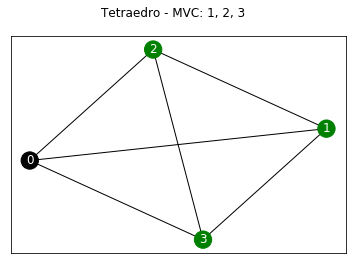

In [4]:
tit = "Tetraedro"
mx = np.matrix([[0, 1, 1, 1],
                [1, 0, 1, 1],
                [1, 1, 0, 1],
                [1, 1, 1, 0]])
G = nx.from_numpy_matrix(np.matrix(mx))
g = convert_from_nx(G); ans = MVC_answer(g)
print('MVC encontrado: {}\nRecursões: {}'.format(ans[0], ans[3]))
MVC_plot(G, ans, titulo = tit + ' - ' + 'MVC: {}'.format(', '.join([str(i) for i in extract_first_sol(ans)])))

__3.3.2)__ Grafo bipartido de Kuratowski K3,3: G = (6, 9) // MVC: 3

MVC encontrado: 3
Recursões: 120


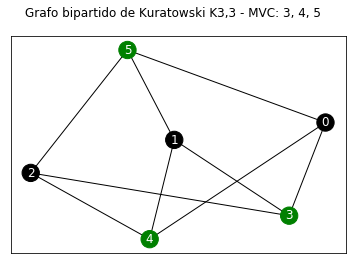

In [5]:
tit = "Grafo bipartido de Kuratowski K3,3"
mx = np.matrix([[0,0,0,1,1,1],
                [0,0,0,1,1,1],
                [0,0,0,1,1,1],
                [1,1,1,0,0,0],
                [1,1,1,0,0,0],
                [1,1,1,0,0,0]])
G = nx.from_numpy_matrix(np.matrix(mx))
g = convert_from_nx(G); ans = MVC_answer(g)
print('MVC encontrado: {}\nRecursões: {}'.format(ans[0], ans[3]))
MVC_plot(G, ans, titulo = tit + ' - ' + 'MVC: {}'.format(', '.join([str(i) for i in extract_first_sol(ans)])))

__3.3.3)__ Octaedro: G = (6, 12) // MVC: 4

MVC encontrado: 4
Recursões: 60


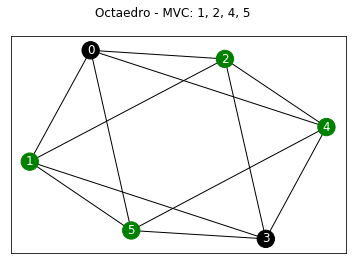

In [6]:
tit = "Octaedro"
mx = np.matrix([[0,1,1,0,1,1],
                [1,0,1,1,0,1],
                [1,1,0,1,1,0],
                [0,1,1,0,1,1],
                [1,0,1,1,0,1],
                [1,1,0,1,1,0]])
G = nx.from_numpy_matrix(np.matrix(mx))
g = convert_from_nx(G); ans = MVC_answer(g)
print('MVC encontrado: {}\nRecursões: {}'.format(ans[0], ans[3]))
MVC_plot(G, ans, titulo = tit + ' - ' + 'MVC: {}'.format(', '.join([str(i) for i in extract_first_sol(ans)])))

__3.3.4)__ Grafo de Bondy-Murty G1: G = (7, 12) // MVC: 4

MVC encontrado: 4
Recursões: 163


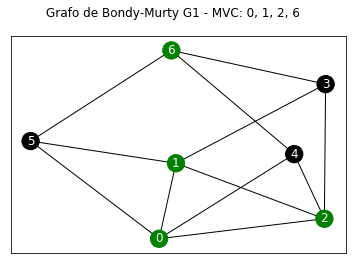

In [7]:
tit = "Grafo de Bondy-Murty G1"
mx = np.matrix([[0,1,1,0,1,1,0],
                [1,0,1,1,0,1,0],
                [1,1,0,1,1,0,0],
                [0,1,1,0,0,0,1],
                [1,0,1,0,0,0,1],
                [1,1,0,0,0,0,1],
                [0,0,0,1,1,1,0]])
G = nx.from_numpy_matrix(np.matrix(mx))
g = convert_from_nx(G); ans = MVC_answer(g)
print('MVC encontrado: {}\nRecursões: {}'.format(ans[0], ans[3]))
MVC_plot(G, ans, titulo = tit + ' - ' + 'MVC: {}'.format(', '.join([str(i) for i in extract_first_sol(ans)])))

__3.3.5)__ Grafo de roda W8: G = (8, 14) // MVC: 5

MVC encontrado: 5
Recursões: 442


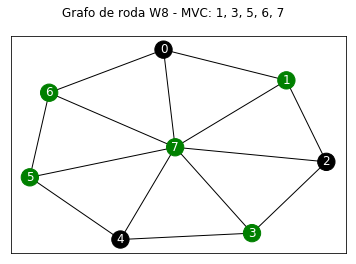

In [8]:
tit = "Grafo de roda W8"
mx = np.matrix([[0,1,0,0,0,0,1,1],
                [1,0,1,0,0,0,0,1],
                [0,1,0,1,0,0,0,1],
                [0,0,1,0,1,0,0,1],
                [0,0,0,1,0,1,0,1],
                [0,0,0,0,1,0,1,1],
                [1,0,0,0,0,1,0,1],
                [1,1,1,1,1,1,1,0]])
G = nx.from_numpy_matrix(np.matrix(mx))
g = convert_from_nx(G); ans = MVC_answer(g)
print('MVC encontrado: {}\nRecursões: {}'.format(ans[0], ans[3]))
MVC_plot(G, ans, titulo = tit + ' - ' + 'MVC: {}'.format(', '.join([str(i) for i in extract_first_sol(ans)])))

__3.3.6)__ Cubo: G = (8, 12) // MVC: 4

MVC encontrado: 4
Recursões: 688


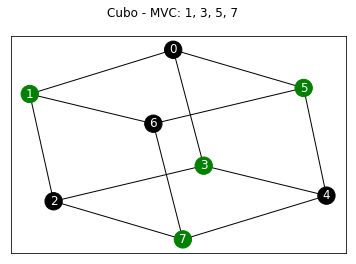

In [9]:
tit = "Cubo"
mx = np.matrix([[0,1,0,1,0,1,0,0],
                [1,0,1,0,0,0,1,0],
                [0,1,0,1,0,0,0,1],
                [1,0,1,0,1,0,0,0],
                [0,0,0,1,0,1,0,1],
                [1,0,0,0,1,0,1,0],
                [0,1,0,0,0,1,0,1],
                [0,0,1,0,1,0,1,0]])
G = nx.from_numpy_matrix(np.matrix(mx))
g = convert_from_nx(G); ans = MVC_answer(g)
print('MVC encontrado: {}\nRecursões: {}'.format(ans[0], ans[3]))
MVC_plot(G, ans, titulo = tit + ' - ' + 'MVC: {}'.format(', '.join([str(i) for i in extract_first_sol(ans)])))

__3.3.7)__ Grafo de Petersen: G = (10, 15) // MVC: 6

MVC encontrado: 6
Recursões: 2560


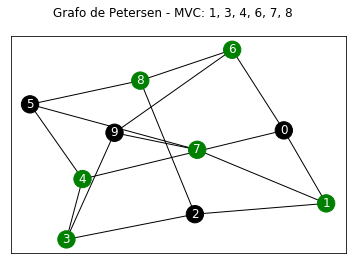

In [10]:
tit = "Grafo de Petersen"
mx = np.matrix([[0,1,0,0,1,0,1,0,0,0],
                [1,0,1,0,0,0,0,1,0,0],
                [0,1,0,1,0,0,0,0,1,0],
                [0,0,1,0,1,0,0,0,0,1],
                [1,0,0,1,0,1,0,0,0,0],
                [0,0,0,0,1,0,0,1,1,0],
                [1,0,0,0,0,0,0,0,1,1],
                [0,1,0,0,0,1,0,0,0,1],
                [0,0,1,0,0,1,1,0,0,0],
                [0,0,0,1,0,0,1,1,0,0]])
G = nx.from_numpy_matrix(np.matrix(mx))
g = convert_from_nx(G); ans = MVC_answer(g)
print('MVC encontrado: {}\nRecursões: {}'.format(ans[0], ans[3]))
MVC_plot(G, ans, titulo = tit + ' - ' + 'MVC: {}'.format(', '.join([str(i) for i in extract_first_sol(ans)])))

__3.3.8)__ Grafo de Bondy-Murty G2: G = (11, 28) // MVC: 7

MVC encontrado: 7
Recursões: 4879


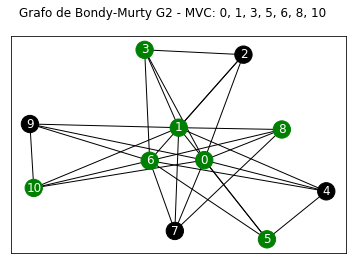

In [11]:
tit = "Grafo de Bondy-Murty G2"
mx = np.matrix([[0,0,1,1,1,1,0,1,1,1,1],
                [0,0,1,1,1,1,0,1,1,1,1],
                [1,1,0,1,0,0,1,0,0,0,0],
                [1,1,1,0,0,0,1,0,0,0,0],
                [1,1,0,0,0,1,1,0,0,0,0],
                [1,1,0,0,1,0,1,0,0,0,0],
                [0,0,1,1,1,1,0,1,1,1,1],
                [1,1,0,0,0,0,1,0,1,0,0],
                [1,1,0,0,0,0,1,1,0,0,0],
                [1,1,0,0,0,0,1,0,0,0,1],
                [1,1,0,0,0,0,1,0,0,1,0]])
G = nx.from_numpy_matrix(np.matrix(mx))
g = convert_from_nx(G); ans = MVC_answer(g)
print('MVC encontrado: {}\nRecursões: {}'.format(ans[0], ans[3]))
MVC_plot(G, ans, titulo = tit + ' - ' + 'MVC: {}'.format(', '.join([str(i) for i in extract_first_sol(ans)])))

__3.3.9)__ Grafo de Grötzsch: G = (11, 20) // MVC: 6

MVC encontrado: 6
Recursões: 5911


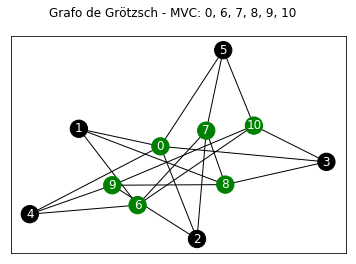

In [12]:
tit = "Grafo de Grötzsch"
mx = np.matrix([[0,1,1,1,1,1,0,0,0,0,0],
                [1,0,0,0,0,0,1,0,1,0,0],
                [1,0,0,0,0,0,0,1,0,1,0],
                [1,0,0,0,0,0,0,0,1,0,1],
                [1,0,0,0,0,0,1,0,0,1,0],
                [1,0,0,0,0,0,0,1,0,0,1],
                [0,1,0,0,1,0,0,1,0,0,1],
                [0,0,1,0,0,1,1,0,1,0,0],
                [0,1,0,1,0,0,0,1,0,1,0],
                [0,0,1,0,1,0,0,0,1,0,1],
                [0,0,0,1,0,1,1,0,0,1,0]])
G = nx.from_numpy_matrix(np.matrix(mx))
g = convert_from_nx(G); ans = MVC_answer(g)
print('MVC encontrado: {}\nRecursões: {}'.format(ans[0], ans[3]))
MVC_plot(G, ans, titulo = tit + ' - ' + 'MVC: {}'.format(', '.join([str(i) for i in extract_first_sol(ans)])))

__3.3.10)__ Grafo de Herschel: G = (11, 18) // MVC: 5

MVC encontrado: 5
Recursões: 15283


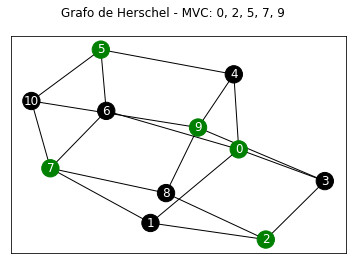

In [13]:
tit = "Grafo de Herschel"
mx = np.matrix([[0,1,0,1,1,0,1,0,0,0,0],
                [1,0,1,0,0,0,0,1,0,0,0],
                [0,1,0,1,0,0,0,0,1,0,0],
                [1,0,1,0,0,0,0,0,0,1,0],
                [1,0,0,0,0,1,0,0,0,1,0],
                [0,0,0,0,1,0,1,0,0,0,1],
                [1,0,0,0,0,1,0,1,0,0,0],
                [0,1,0,0,0,0,1,0,1,0,1],
                [0,0,1,0,0,0,0,1,0,1,0],
                [0,0,0,1,1,0,0,0,1,0,1],
                [0,0,0,0,0,1,0,1,0,1,0]])
G = nx.from_numpy_matrix(np.matrix(mx))
g = convert_from_nx(G); ans = MVC_answer(g)
print('MVC encontrado: {}\nRecursões: {}'.format(ans[0], ans[3]))
MVC_plot(G, ans, titulo = tit + ' - ' + 'MVC: {}'.format(', '.join([str(i) for i in extract_first_sol(ans)])))

__3.3.11)__ Icosaedro: G = (12, 30) // MVC: 9

MVC encontrado: 9
Recursões: 1944


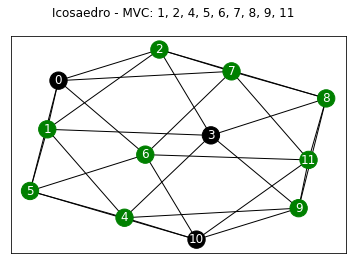

In [14]:
tit = "Icosaedro"
mx = np.matrix([[0,1,1,0,0,1,1,1,0,0,0,0],
                [1,0,1,1,1,1,0,0,0,0,0,0],
                [1,1,0,1,0,0,0,1,1,0,0,0],
                [0,1,1,0,1,0,0,0,1,1,0,0],
                [0,1,0,1,0,1,0,0,0,1,1,0],
                [1,1,0,0,1,0,1,0,0,0,1,0],
                [1,0,0,0,0,1,0,1,0,0,1,1],
                [1,0,1,0,0,0,1,0,1,0,0,1],
                [0,0,1,1,0,0,0,1,0,1,0,1],
                [0,0,0,1,1,0,0,0,1,0,1,1],
                [0,0,0,0,1,1,1,0,0,1,0,1],
                [0,0,0,0,0,0,1,1,1,1,1,0]])
G = nx.from_numpy_matrix(np.matrix(mx))
g = convert_from_nx(G); ans = MVC_answer(g)
print('MVC encontrado: {}\nRecursões: {}'.format(ans[0], ans[3]))
MVC_plot(G, ans, titulo = tit + ' - ' + 'MVC: {}'.format(', '.join([str(i) for i in extract_first_sol(ans)])))

__3.3.12)__ Grafo de Bondy-Murty G3: G = (14, 21) // MVC: 7

MVC encontrado: 7
Recursões: 259000


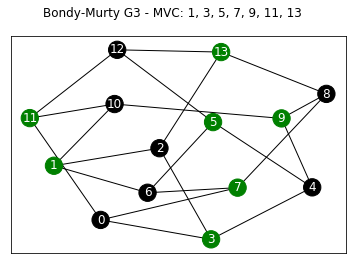

In [15]:
tit = "Bondy-Murty G3"
mx = np.matrix([[0,0,0,1,0,0,0,1,0,0,0,1,0,0],
                [0,0,1,0,0,0,1,0,0,0,1,0,0,0],
                [0,1,0,1,0,0,0,0,0,0,0,0,0,1],
                [1,0,1,0,1,0,0,0,0,0,0,0,0,0],
                [0,0,0,1,0,1,0,0,0,1,0,0,0,0],
                [0,0,0,0,1,0,1,0,0,0,0,0,1,0],
                [0,1,0,0,0,1,0,1,0,0,0,0,0,0],
                [1,0,0,0,0,0,1,0,1,0,0,0,0,0],
                [0,0,0,0,0,0,0,1,0,1,0,0,0,1],
                [0,0,0,0,1,0,0,0,1,0,1,0,0,0],
                [0,1,0,0,0,0,0,0,0,1,0,1,0,0],
                [1,0,0,0,0,0,0,0,0,0,1,0,1,0],
                [0,0,0,0,0,1,0,0,0,0,0,1,0,1],
                [0,0,1,0,0,0,0,0,1,0,0,0,1,0]])
G = nx.from_numpy_matrix(np.matrix(mx))
g = convert_from_nx(G); ans = MVC_answer(g)
print('MVC encontrado: {}\nRecursões: {}'.format(ans[0], ans[3]))
MVC_plot(G, ans, titulo = tit + ' - ' + 'MVC: {}'.format(', '.join([str(i) for i in extract_first_sol(ans)])))

__3.4) Testando o algoritmo exato__

Dos testes efetuados, observa-se que o algoritmo responde de formas diferentes dependendo do grafo avaliado. Por exemplo, foram necessárias 15.283 recursões para solucionar o MVC do Grafo de Herschel, de 11 vértices, ao passo que a solução para o Icosaedro, de 12 vértices, foram necessárias somente 1.944 recursões. Ressalta-se também que para o Grafo de Bondy-Murty G3 foram necessárias mais de 250 mil recursões, mostrando que, para grafos com mais de 14 vértices, o algoritmo pode não ser mais factível. 

Diante do exposto, verificamos o desempenho do algoritmo variando-se a quantidade de vértices (V) de três tipos diferentes de grafos: completos, bipartidos completos e binomiais. Nos grafos completos todas as possibilidades de arestas entre os vértices estão presentes. Para os bipartidos, são selecionados dois conjuntos com a mesma quantidade de vértices, sendo que cada nó de um conjunto está associado a cada nó do outro conjunto. Para grafos com totais ímpares de vértices, um conjunto apresentará um nó a mais que o outro. Quanto aos grafos binomiais - também conhecidos como grafos de Erdős-Rényi (Erdős; Rényi, 1959) - foi considerada uma proabilidade de criação de arestas igual a 50%.

Assim, foram gerados grafos de 4 a 13 vértices sendo que, para cada grafo, o algoritmo exato foi executado 30 vezes, registrando-se o tempo médio de execução e o respectivo intervalo de confiança, considerando uma distribuição normal. A execução foi efetuada em máquina com processador Inter(R) Core(TM) i7-8700T CPU 2.40GHz, 32 GB de memória RAM e sistema operacional de 64 bits, Windows 10 Enterprise, utilizando a linguagem de programação Python (v3.7.1) com auxílio de bibliotecas como numpy (v1.15.4), pandas (v0.23.4), scipy (v1.2.1) e networkx (v2.5).

In [127]:
G1_ans = {}; G1_sts = {}
G2_ans = {}; G2_sts = {}
G3_ans = {}; G3_sts = {}
seed = 42; p = .5

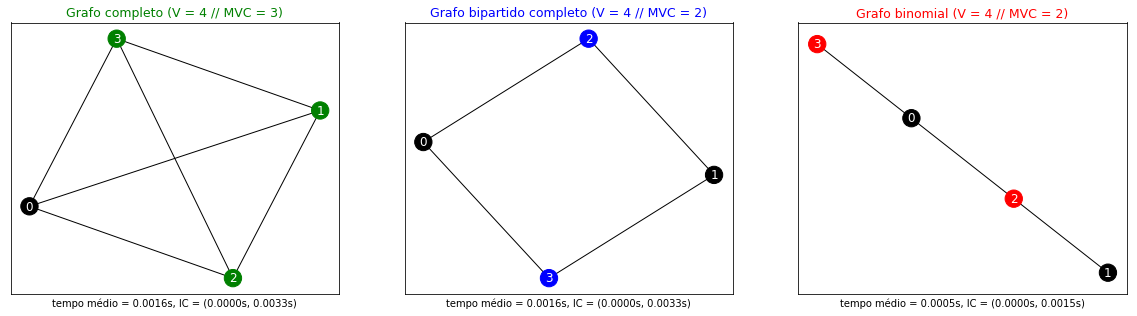

In [139]:
Nv = 4; Nv1 = round(Nv/2); Nv2 = Nv - Nv1;
G1 = nx.complete_graph(Nv); G2 = nx.complete_bipartite_graph(Nv1, Nv2); G3 = nx.random_graphs.binomial_graph(Nv, p, seed)
G1_ans[Nv] = get_answers(G1); G2_ans[Nv] = get_answers(G2); G3_ans[Nv] = get_answers(G3)
G1_sts[Nv] = times_n_stats(G1_ans[Nv][1]); G2_sts[Nv] = times_n_stats(G2_ans[Nv][1]); G3_sts[Nv] = times_n_stats(G3_ans[Nv][1])
graph_charts_plot(Nv, G1_ans, G1_sts, G2_ans, G2_sts, G3_ans, G3_sts, save_fig = True)

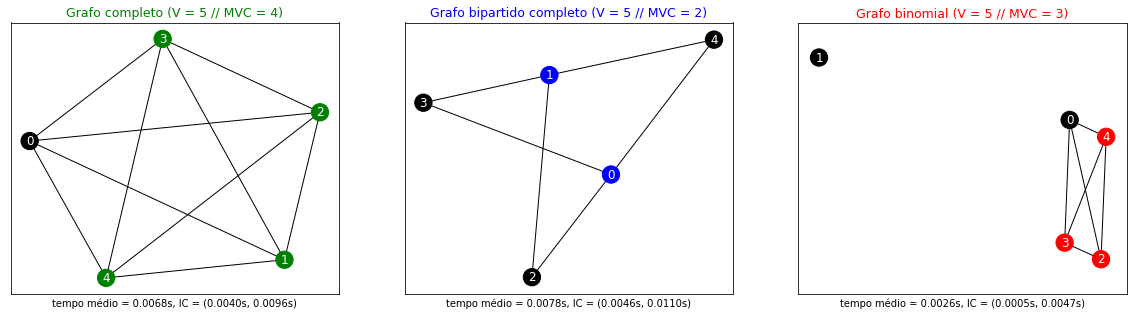

In [140]:
Nv = 5; Nv1 = round(Nv/2); Nv2 = Nv - Nv1;
G1 = nx.complete_graph(Nv); G2 = nx.complete_bipartite_graph(Nv1, Nv2); G3 = nx.random_graphs.binomial_graph(Nv, p, seed)
G1_ans[Nv] = get_answers(G1); G2_ans[Nv] = get_answers(G2); G3_ans[Nv] = get_answers(G3)
G1_sts[Nv] = times_n_stats(G1_ans[Nv][1]); G2_sts[Nv] = times_n_stats(G2_ans[Nv][1]); G3_sts[Nv] = times_n_stats(G3_ans[Nv][1])
graph_charts_plot(Nv, G1_ans, G1_sts, G2_ans, G2_sts, G3_ans, G3_sts, save_fig = True)

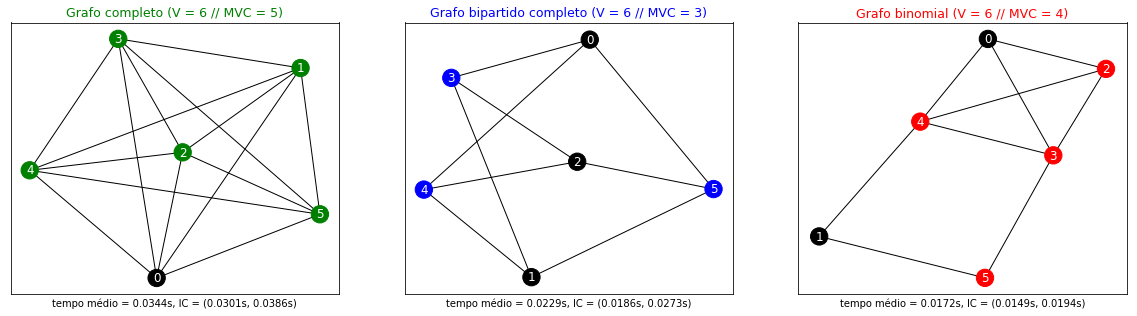

In [141]:
Nv = 6; Nv1 = round(Nv/2); Nv2 = Nv - Nv1;
G1 = nx.complete_graph(Nv); G2 = nx.complete_bipartite_graph(Nv1, Nv2); G3 = nx.random_graphs.binomial_graph(Nv, p, seed)
G1_ans[Nv] = get_answers(G1); G2_ans[Nv] = get_answers(G2); G3_ans[Nv] = get_answers(G3)
G1_sts[Nv] = times_n_stats(G1_ans[Nv][1]); G2_sts[Nv] = times_n_stats(G2_ans[Nv][1]); G3_sts[Nv] = times_n_stats(G3_ans[Nv][1])
graph_charts_plot(Nv, G1_ans, G1_sts, G2_ans, G2_sts, G3_ans, G3_sts, save_fig = True)

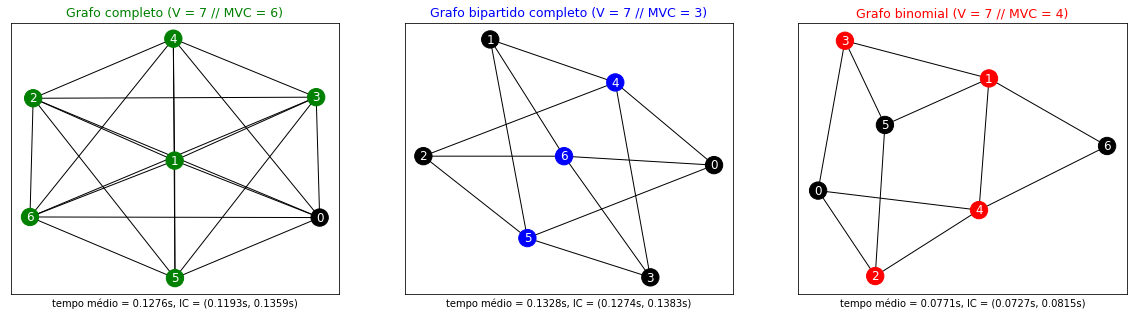

In [142]:
Nv = 7; Nv1 = round(Nv/2); Nv2 = Nv - Nv1;
G1 = nx.complete_graph(Nv); G2 = nx.complete_bipartite_graph(Nv1, Nv2); G3 = nx.random_graphs.binomial_graph(Nv, p, seed)
G1_ans[Nv] = get_answers(G1); G2_ans[Nv] = get_answers(G2); G3_ans[Nv] = get_answers(G3)
G1_sts[Nv] = times_n_stats(G1_ans[Nv][1]); G2_sts[Nv] = times_n_stats(G2_ans[Nv][1]); G3_sts[Nv] = times_n_stats(G3_ans[Nv][1])
graph_charts_plot(Nv, G1_ans, G1_sts, G2_ans, G2_sts, G3_ans, G3_sts, save_fig = True)

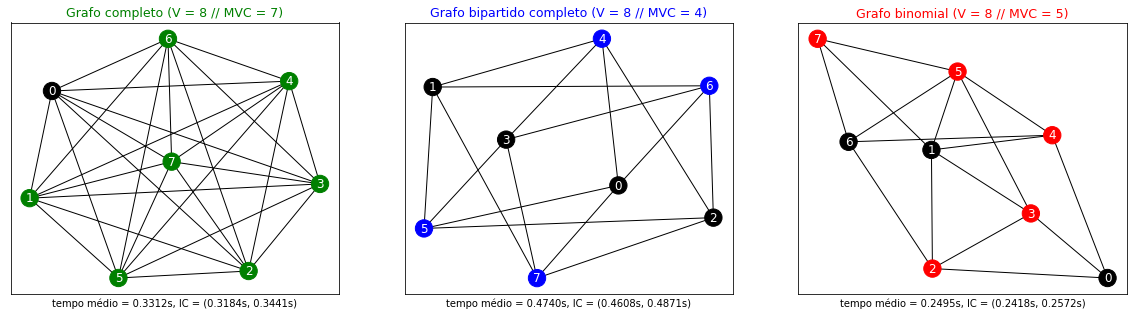

In [144]:
Nv = 8; Nv1 = round(Nv/2); Nv2 = Nv - Nv1;
G1 = nx.complete_graph(Nv); G2 = nx.complete_bipartite_graph(Nv1, Nv2); G3 = nx.random_graphs.binomial_graph(Nv, p, seed)
G1_ans[Nv] = get_answers(G1); G2_ans[Nv] = get_answers(G2); G3_ans[Nv] = get_answers(G3)
G1_sts[Nv] = times_n_stats(G1_ans[Nv][1]); G2_sts[Nv] = times_n_stats(G2_ans[Nv][1]); G3_sts[Nv] = times_n_stats(G3_ans[Nv][1])
graph_charts_plot(Nv, G1_ans, G1_sts, G2_ans, G2_sts, G3_ans, G3_sts, save_fig = True)

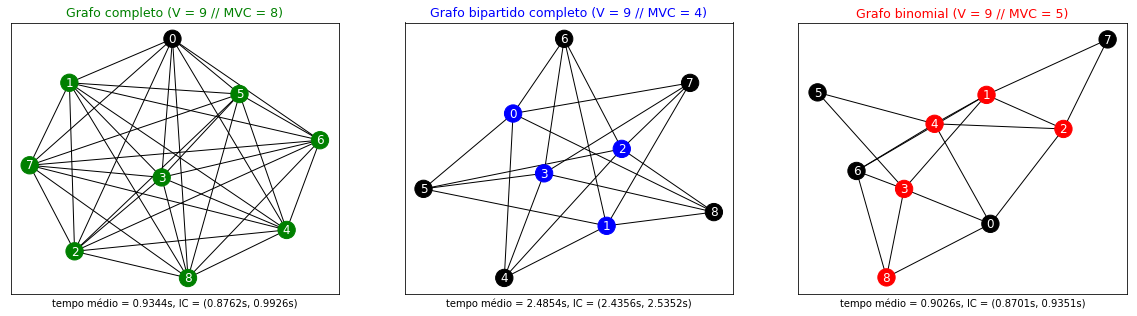

In [145]:
Nv = 9; Nv1 = round(Nv/2); Nv2 = Nv - Nv1;
G1 = nx.complete_graph(Nv); G2 = nx.complete_bipartite_graph(Nv1, Nv2); G3 = nx.random_graphs.binomial_graph(Nv, p, seed)
G1_ans[Nv] = get_answers(G1); G2_ans[Nv] = get_answers(G2); G3_ans[Nv] = get_answers(G3)
G1_sts[Nv] = times_n_stats(G1_ans[Nv][1]); G2_sts[Nv] = times_n_stats(G2_ans[Nv][1]); G3_sts[Nv] = times_n_stats(G3_ans[Nv][1])
graph_charts_plot(Nv, G1_ans, G1_sts, G2_ans, G2_sts, G3_ans, G3_sts, save_fig = True)

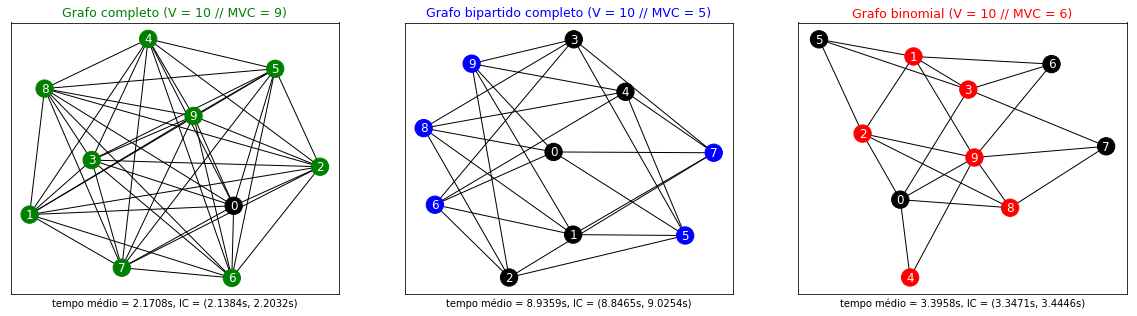

In [146]:
Nv = 10; Nv1 = round(Nv/2); Nv2 = Nv - Nv1;
G1 = nx.complete_graph(Nv); G2 = nx.complete_bipartite_graph(Nv1, Nv2); G3 = nx.random_graphs.binomial_graph(Nv, p, seed)
G1_ans[Nv] = get_answers(G1); G2_ans[Nv] = get_answers(G2); G3_ans[Nv] = get_answers(G3)
G1_sts[Nv] = times_n_stats(G1_ans[Nv][1]); G2_sts[Nv] = times_n_stats(G2_ans[Nv][1]); G3_sts[Nv] = times_n_stats(G3_ans[Nv][1])
graph_charts_plot(Nv, G1_ans, G1_sts, G2_ans, G2_sts, G3_ans, G3_sts, save_fig = True)

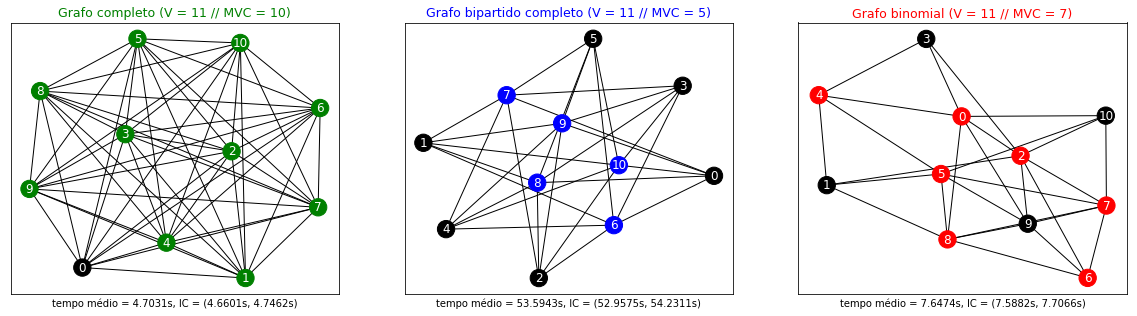

In [147]:
Nv = 11; Nv1 = round(Nv/2); Nv2 = Nv - Nv1;
G1 = nx.complete_graph(Nv); G2 = nx.complete_bipartite_graph(Nv1, Nv2); G3 = nx.random_graphs.binomial_graph(Nv, p, seed)
G1_ans[Nv] = get_answers(G1); G2_ans[Nv] = get_answers(G2); G3_ans[Nv] = get_answers(G3)
G1_sts[Nv] = times_n_stats(G1_ans[Nv][1]); G2_sts[Nv] = times_n_stats(G2_ans[Nv][1]); G3_sts[Nv] = times_n_stats(G3_ans[Nv][1])
graph_charts_plot(Nv, G1_ans, G1_sts, G2_ans, G2_sts, G3_ans, G3_sts, save_fig = True)

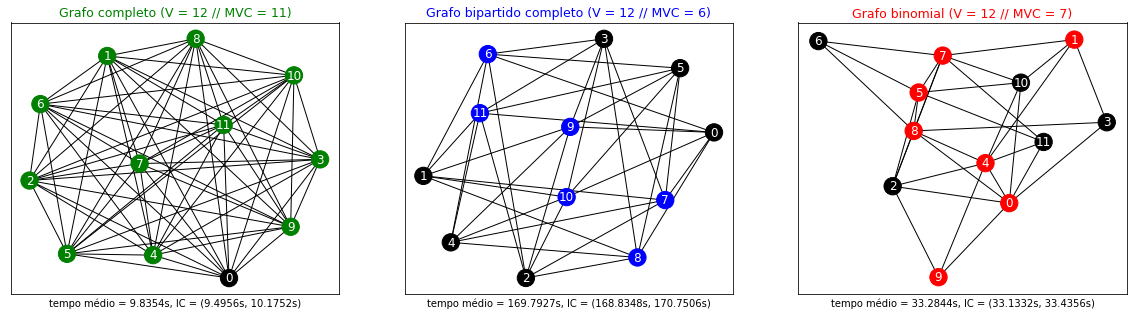

In [148]:
Nv = 12; Nv1 = round(Nv/2); Nv2 = Nv - Nv1;
G1 = nx.complete_graph(Nv); G2 = nx.complete_bipartite_graph(Nv1, Nv2); G3 = nx.random_graphs.binomial_graph(Nv, p, seed)
G1_ans[Nv] = get_answers(G1); G2_ans[Nv] = get_answers(G2); G3_ans[Nv] = get_answers(G3)
G1_sts[Nv] = times_n_stats(G1_ans[Nv][1]); G2_sts[Nv] = times_n_stats(G2_ans[Nv][1]); G3_sts[Nv] = times_n_stats(G3_ans[Nv][1])
graph_charts_plot(Nv, G1_ans, G1_sts, G2_ans, G2_sts, G3_ans, G3_sts, save_fig = True)

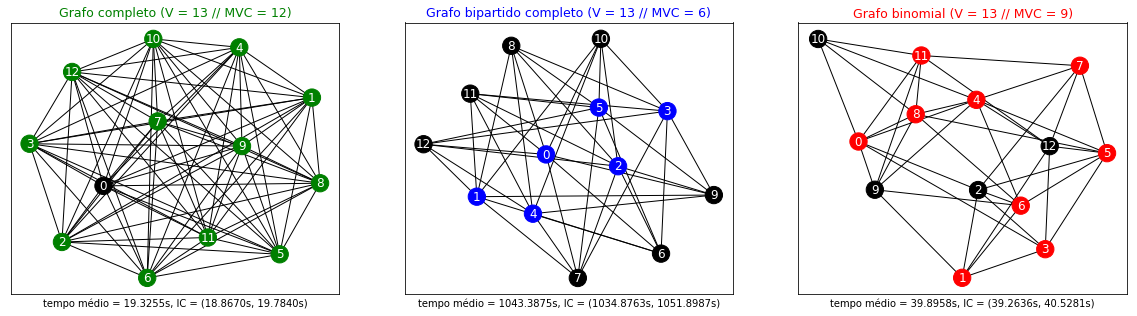

In [200]:
Nv = 13; Nv1 = round(Nv/2); Nv2 = Nv - Nv1;
G1 = nx.complete_graph(Nv); G2 = nx.complete_bipartite_graph(Nv1, Nv2); G3 = nx.random_graphs.binomial_graph(Nv, p, seed)
G1_ans[Nv] = get_answers(G1); G2_ans[Nv] = get_answers(G2); G3_ans[Nv] = get_answers(G3)
G1_sts[Nv] = times_n_stats(G1_ans[Nv][1]); G2_sts[Nv] = times_n_stats(G2_ans[Nv][1]); G3_sts[Nv] = times_n_stats(G3_ans[Nv][1])
graph_charts_plot(Nv, G1_ans, G1_sts, G2_ans, G2_sts, G3_ans, G3_sts, save_fig = True)

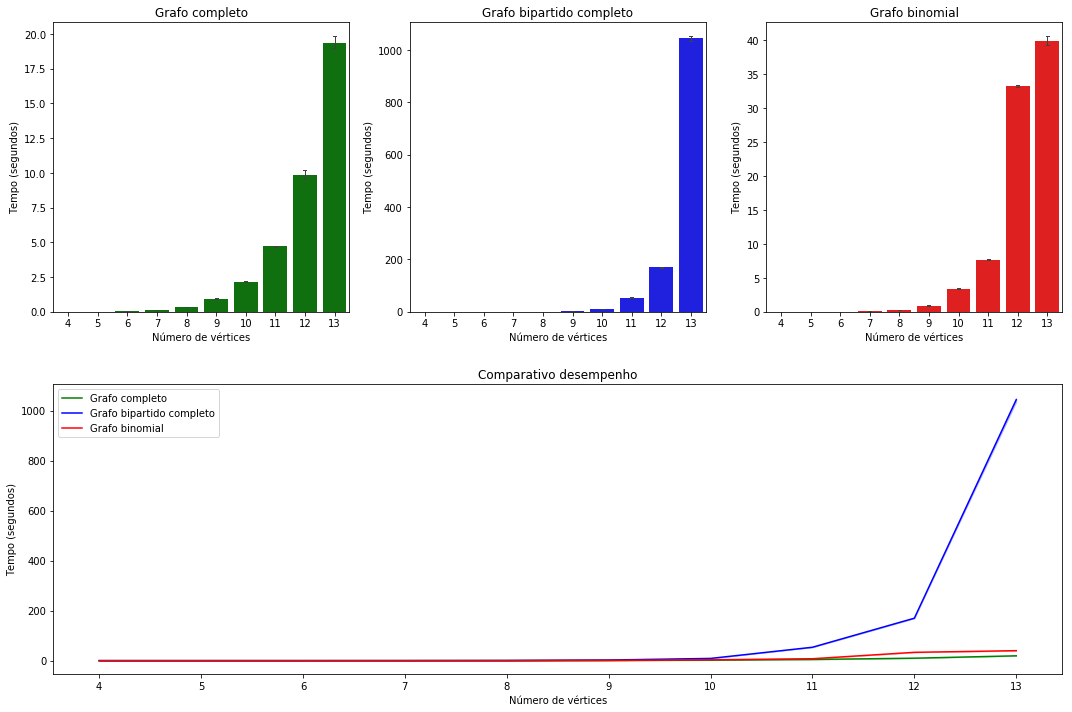

In [259]:
plot_results(G1_ans, G2_ans, G3_ans, save_fig = True)

Sabe-se que o MVC de grafos completos equivale ao número total de vértices do grafo subtraído de uma unidade, ja que cada nó se conecta a todos os outros, de modo que todas as arestas possíveis estão contidas no grafo. Para grafos bipartidos completos, a menor cobertura de vértices seria constituída dos nós do menor conjunto, uma vez que cada um dos vértices de cada cojunto está conectado somente a cada um dos nós do outro conjunto. Assim sendo, observa-se que o alogitmo exato obteve êxito em encontrar as soluções nesses grafos em cada uma das variações de vértices. Contudo, o seu desempenho se mostrou notadamente pior para MVC em grafos bipartidos. No caso dos grafos binomiais, como a formação das arestas é incerta, a menor cobertura de vértices varia. Não obstante, o algoritmo teve uma perfomance próxima da dos grafos completos. Em todo caso, é possível constatar que, independentemente do tipo do grafo, o tempo gasto pelo algoritmo para encontrar a solução exata do problema cresce de forma não polinomial a medida que o número de vértices aumenta. Assim, para grafos com 30 vértices, por exemplo, o algoritmo pode não ser mais factível.

#### 4) Algoritmos aproximados

Referência: Kotecha & Gambhava, 2003

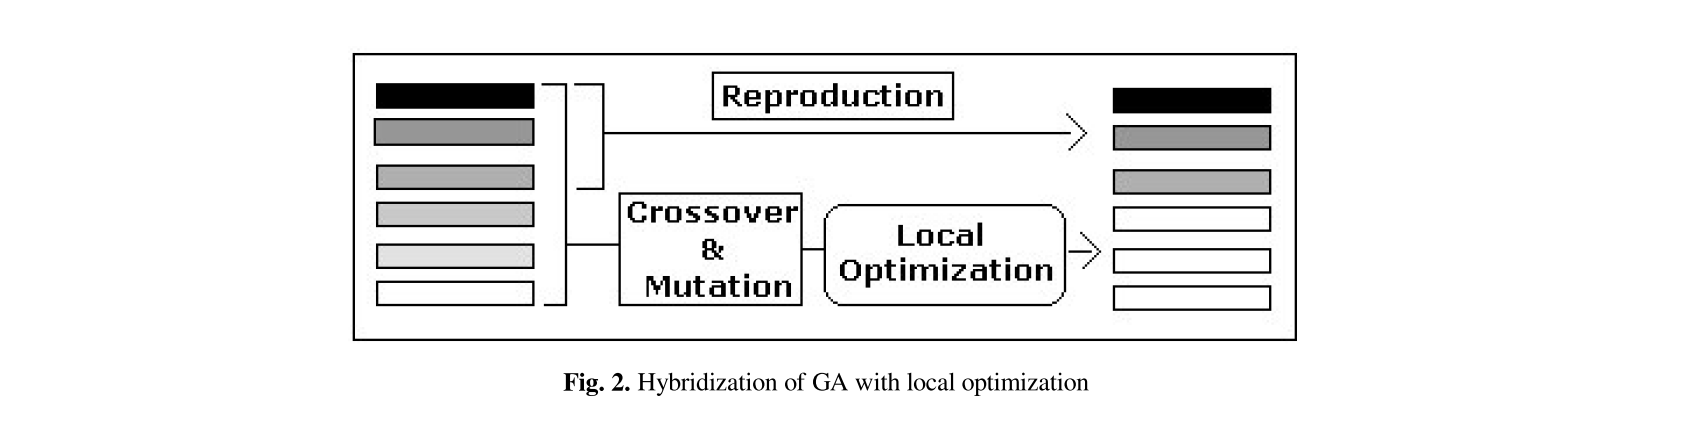

Sendo o MVC um problema NP-completo, seria improvável encontrar uma solução em tempo polinomial. Para contornar essa situação foram selecionados algoritmos aproximados para encontrar soluções quase ótimas em tempo factível. Kotecha e Gambhava, em 2003, propuseram uma meta-heurística envolvendo um algoritmo genético híbrido (HGA) que conta com uma heurística desenvolvida pelos autores, denominada heurística do operador de cruzamento de vértices (HVX), na etapa de reprodução, e com a aplicação de técnica de otimização local (LOT) nos descendentes das populações ao longo das gerações. O objetivo é alcançar soluções ótimas com populações pequenas e com números reduzidos de gerações, demonstrando performance superior a dos algoritmos genéticos clássicos uma vez que converge com maior velocidade para o ótimo global. Ademais, concluiu-se que o HVX, designado especialmente para o MVC, trabalha muito bem e converge rapidamente para uma solução ótima, configurando, por si só, uma heurística eficiente para o problema em questão.

Diante do exposto, serão comparados os resultados dos algoritmos HGA e HVX usando, como referência, 20 das 40 instâncias do Benchmarks with Hidden Optimum Solutions for Graph Problems (BHOSLIB) apresentadas na competição SAT de 2004, sendo traduzidas de problemas booleanos de satisfação (SAT) gerados aleatoriamente na área de transição de fase de acordo com o modelo RB, proposto por Xu & Li, 2000, e que foram provadas de serem difíceis tanto na teoria quanto na prática (Xu et al. 2007). Ressalta-se que o _benchmark_ BHOSLIB tem sido amplamente utilizado na literatura como um ponto de referência para novas heurísticas associadas ao problema de MVC (Cai, Su, Schen; 2010), estando suas instâncias disponíveis no endereço eletrônico http://sites.nlsde.buaa.edu.cn/~kexu/benchmarks/graph-benchmarks.htm.

__4.1) Funções base__

As funções base são pilares que sustentam os algoritmos HVX, LOT e, conjuntamente, o HGA.

In [269]:
def gen_chromo(G, binary = False):
    """
    A função retorna um cromossomo contendo uma possível solução de cobertura vértices para um dado grafo 'G'.
    A lista resultante pode ser um cromossomo binário (conjunto de itens booleanos, com tamanho igual ao 
    número de vértices do grafo) ou um cromossomo simples, contendo somente os vértices da possível solução (default).
    """
    p = []
    g = G.copy()
    #enquanto o número de arestas do grafo for maior que zero, remove aleatoriamente um vértice e o inclui no "vertex cover"
    #ao final teremos uma possível solução para o MVC do grafo 
    while len(g.edges) > 0:
        nodes = list(g.nodes)
        shuffle(nodes)
        p.append(nodes[0])
        g.remove_nodes_from([nodes[0]])    
    p = np.array([v in p for v in list(G.nodes)])
    P = list(np.array(G.nodes)[p])
    if binary:
        return p
    else:
        return P

def p_to_binary(G, p):
    """
    A função converte um cromossomo 'p' em formato simples (lista contendo os vértices de uma possível solução) em
    um cromossomo binário (lista de cumprimento igual ao número de vértices do grafo 'G' contendo valores booleanos 
    referentes a presença ou não dos vértices na solução).
    """
    return [v in p for v in list(G.nodes)] 

def p_from_binary(G, p):
    """
    A função converte um cromossomo binário simples 'p' (lista de cumprimento igual ao número de vértices do grafo 
    'G' contendo valores booleanos referentes a presença ou não dos vértices na solução) em um cromossomo de formato
    simples (lista contendo os vértices da solução).
    """
    return list(np.array(G.nodes)[p])

def check_solution(G, sol):
    """
    A função recebe uma lista 'sol' contendo um conjunto de vértices e verifica se estes constituem uma cobertura de
    vértices do grafo 'G' informado, retornando True em caso positivo ou False em caso negativo.
    """
    g = G.copy()
    #remove do grafo todos os vértices informados e verifica se nele restou alguma aresta.
    g.remove_nodes_from(sol)
    if len(g.edges) == 0:
        return True
    else:
        return False

def normal_round(n):
    """
    A função retorna o arredondamento do número 'n' informado. Caso a parcela decimal seja igual ou superior a 0.5,
    o arredondamento é para cima. Do contrário, para baixo.
    """
    if n - math.floor(n) < 0.5:
        return math.floor(n)
    return math.ceil(n)

def mutation(G, p):
    """
    A função recebe um grafo 'G' e um cromossomo simples ou binário 'p' e efetua uma mutação aleatória em um de seus 
    bits (vértices). Caso a mutação resulte em um cromossomo inválido, i. e., que não represente uma solução de cobertura
    de vértices de G, outro bit é selecionado para a mutação. Esse procedimento ocorre iterativamente até que a mutação
    seja válida ou que todos os bits sejam mutados sem sucesso, retornando, nesse caso, o cromossomo original.
    """
    
    P = p.copy()
    P1 = P.copy()
    b = True
    G = G.copy()
    #verifica se o cromossomo 'p' informado é binário. Caso negativo, o converte em binário usando a função 'p_to_binary'
    if not isinstance(P[0], bool):
        b = False
        P = p_to_binary(G, P)        
        
    #cria uma lista com as posições dos bits do cromossomo 'p'
    #escolhe aleatoriamente uma posição de um bit e inverte o valor booleano do respectivo bit
    #aplica sobre o cromossomo mutado a função 'check_solution'
    #se a mutação for válida, interrompe o processo
    #caso contrário retira a posição do bit da lista de posições e repete o processo
    #a iteração ocorre até que uma mutação seja válida ou não reste elementos na lista de posições
    ck = True; r = list(range(len(P)))
    while ck and len(r) > 0:
        P1 = P.copy()        
        ale = choice(r)
        P1[ale] = not P1[ale]
        if check_solution(G, p_from_binary(G, P1)):
            ck = False
        else:
            r.remove(ale)
    
    #se a iteração finalizou com uma mutação válida, armazena o cromossomo mutado. Do contrário, mantém o mesmo cromossomo 'p'
    if ck: P1 = P
         
    #se o cromossomo 'p' foi informado em formato simples, converte o resultado usando a função 'p_from_binary' 
    if b:
        return P1
    else:       
        return p_from_binary(G, P1)

def fitness_evaluation(pop): 
    """
    A função recebe uma lista de cromossomos (possíveis soluções) e retorna uma lista ordenada ascendentemente de acordo com
    o número de vértices dos seus cromossomos.
    """
    pp = pop.copy()
    order = [len(c) for c in pp]
    return [x for _,x in sorted(zip(order,pp))]

__4.2) Código do algoritmo Heurística do Operador de Cruzamento de Vértice (HVX)__

In [270]:
class HVX:
    
    def __init__(self, G, P1 = None, P2 = None): 
        """
        Recebe um grafo 'G' e, opcionalmente, dois cromossomos simples 'P1' e 'P2' (listas com possíveis soluções de cobertura
        de vértice do grafo 'G'). Se os cromossomos não forem informados, executa a função 'gen_chromo' para obter dois
        cromossomos aleatórios. Tanto o grafo quanto os cromossomos passam a ser atributos da classe HVX.
        """
        
        self.graph = G.copy()
        
        if P1 is None: P1 = gen_chromo(G)
        if P2 is None: P2 = gen_chromo(G)
        
        self.P1 = P1.copy()
        self.P2 = P2.copy()    
        
    def pbinary(self, P1 = True):
        """
        A função retorna os atributos de cromossomo da classe convertidos em binários.
        """
        
        if P1: 
            return p_to_binary(self.graph, self.P1)
        else:
            return p_to_binary(self.graph, self.P1)
        
    def vertex_cover(self):
        """
        A função retorna um cromossomo resultado do cruzamento (crossover) dos atributos 'P1' e 'P2', usando a metodologia
        proposta por Kotecha & Gambhava, 2003.
        """
        
        answer = []
        G = self.graph.copy()
        p1 = self.P1.copy()
        p2 = self.P2.copy()
        
        def VT(G, p1, p2):            
            """
            A função, interna à 'vertex_cover', recebe um grafo 'G' e dois cromossomos simples 'p1' e 'p2', retornando 
            os valores da 'tabela de vértices dos cromossomos pais (VT)', i. e., uma lista com tuplas contendo:
            [0] - um vértice 'v' contido no conjunto de vértices dos cromossomos pais;
            [1] - a frequência com que o vértice 'v' aparece no conjunto de vértices dos cromossomos pais: 'F(v)'; e
            [2] - o grau (ou valência) do vértice 'v', i. e., o número de arestas do grafo 'G' que incidem em 'v': 'N(v)'. 
            """
            
            c1 = p1.copy()
            c2 = p2.copy()
            #associa à variável local 'E' um dicionário contendo o grau de cada um dos vértices do grafo 'G'
            E = dict(G.degree)     
            #cria uma lista 'v' contendo o conjunto de todos os vértices dos cromossomos 'p1' e 'p2'
            v = list(set(c1+c2))
            #para cada vértice da lista 'v', insere, em uma lista 'ans1', tuplas contendo as informações em epígrafe
            ans1 = []
            for nod in v:
                ans1.append((nod, c1.count(nod) + c2.count(nod), E[nod]))
            return ans1
        
        def select_vertex(VT_ans):
            """
            A função, interna à 'vertex_cover', recebe uma lista com tuplas contendo os valores de 'v', 'F(v)' e 'N(v)'
            para cada vértice dos cromossomos 'p1' e 'p2', sendo esse o resultado retornado pela função interna 'VT'.
            Seleciona, então, a melhor tupla, considerando os critérios estabelecidos por Kotecha & Gambhava, 2003, quais
            sejam: 1º)'N(v)' e 2º)'F(v)'. Em caso de empate, sorteia uma das possíveis soluções. Por fim, retorna a tupla
            escolhida.
            """
            #cria uma lista 'lst' ordenada decrescentemente de acordo com os valores de N(v) e F(v), nesse ordem de preferência
            lst = sorted(VT_ans, key=lambda item: (item[2], item[1]), reverse=True)
            #seleciona o primeiro valor da lista 'lst' como possível solução, associando-o a uma variável 'ans2'
            ans2 = lst[0]
            #cria uma lista 'ans2s' de possíveis soluções, contendo, em princípio, apenas a solução 'ans2'
            ans2s = [ans2]
            #seguindo a ordenação de lst, verifica, para cada um dos elementos seguintes: 
            #1º) se N(v) é inferior ao da solução selecionada - caso positivo, interrompe o processo
            #2º) se F(v) é inferior ao da solução selecionada - caso positivo, interrompe o processo
            #se negativas ambas as condições acima, insere o elemento da iteração na lista 'asn2s' como uma possível solução            
            for i in lst[1:]:
                if i[2] < ans2[2]:            
                    break
                else:
                    if i[1] < ans2[1]:                
                        break
                    else:
                        ans2s.append(i)
            #embaralha as soluções de 'ans2s' e retorna o primeiro valor da lista 'ans2s'; esse passo garante que,
            #caso haja mais de uma solução possível, a função sorteie uma delas aleatoriamente            
            shuffle(ans2s)            
            return ans2s[0]  
        
        #aplica as funções 'VT' e 'select_vertex' nos cromossomos 'p1' e 'p2', inserindo os vértices selecionados na lista 'answer'
        #os vértices selecionados são removidos dos cromossomos pais ('p1' e 'p2') e do grafo 'G'
        #o processo é repetido até que não restem mais arestas no grafo 'G'
        #ao final é ordenada e retornada a lista 'answer', representando um cromossomo descendente (offspring) de 'p1' e 'p2'.
        #os vértices que constituem o cromossomos são, por si só, uma solução quase ótima para o MVC do grafo 'G'        
        while len(G.edges) > 0:
            vn = select_vertex(VT(G, p1, p2))
            answer.append(vn[0])
            p1 = [c for c in p1 if c !=vn[0]]
            p2 = [c for c in p2 if c !=vn[0]]
            G.remove_node(vn[0])            
        return sorted(answer)

__4.3) Código do algoritmo Técnica de Otimização Local (LOT)__

In [271]:
def LOT(G, sol):
    """
    A função recebe um grafo 'G' e um cromossomo 'sol' contendo uma possível solução para a menor cobertura de vértices de 'G'.
    Embaralha, então, os vértices contidos em 'sol' e, iterativamente, os remove um a um, verificando se o cromossomo restante
    ainda representa uma solução de cobertura de vértices de 'G'. Caso positivo, continua a processo até encontrar a menor solução
    possível, retornando-a de forma ordenada. Caso não seja possível a remoção de nenhum vértice, retorna a solução original.
    Note que este algoritmo de LOT é executado em O(N²), já que seleciona, aleatoriamente, um ponto de partida. Em outras palavras,
    não são consideradas todas as permutações de vértices para o processo de remoção por profundidade. Caso assim fosse, a função
    estaria executando um algoritmo exato para o problema NP-completo de MVC, com execução em tempo não polinomial. 
    
    """
    G = G.copy()
    s = sol.copy()
    #cria uma lista 's' igual ao cromossomo 'sol' e embaralha seus vértices
    shuffle(s)
    #cria uma nova lista 's1' retirando-se o primeiro elemento de 's'
    #verifica se a lista 's1' é uma solução de cobertura de vértices de 'G', usando a função 'check_solution'
    #caso positivo, a lista 's' passa a ser igual a lista reduzida 's1' e o processo se repete
    #caso negativo, a lista 's1' é gerada novamente removendo o segundo elemento de 's'
    #o processo se repete até que que todos os elementos de 's' sejam percorridos
    #note que a condição que finaliza o loop 'while' é a mesma independentemente de eventuais alterações em 's'
    #decorrentes do loop 'for'; isso permite que o comando percorra o cromossomo até a menor solução,
    #partindo do primeiro bit (ou vértice) selecionado aleatoriamente (ao se embaralhar a lista no começo)
    ck = True
    while ck:
        for i in range(len(s)):            
            s1 = s[:i] + s[i+1:]
            if check_solution(G, s1):
                s = s1.copy()
                break
            ck = False
    return sorted(s)

__4.4) Código do Algoritmo Genético Híbrido (HGA)__

In [479]:
class HGA:
    
    def __init__(self, G, pop = 100, gen = 10):         
        """
        Recebe um grafo 'G' e, opcionalmente, os parâmetros 'pop' - referente ao tamanho da população - e 'gen' - referente 
        à quantidade de gerações - com os valores de 100 e 10, respectivamente, estabelecidos por default. Os valores de entrada
        são, então, transformados em atributos da classe 'HGA', junto com o atributo 'population', com valor inicialmente nulo.
        obs. 1: Kotecha & Gambhava (2003) usam populações de tamanho 25, não mencionando os valores empregados para as gerações.
        obs. 2: Ugurlu (2013) usou populações de tamanho menor ou igual a 100 e 10 gerações na sua variação do algoritmo HGA.
        """                       
        self.graph = G.copy()
        self.n_pop = pop
        self.n_gen = gen
        self.population = None        
        
    def pop_start(self):
        """
        A função altera o atributo 'population' da classe HGA, atribuindo a ele uma lista contendo um quantidade
        de cromossomos simples equivalente ao atributo de gerações passado inicialmente. Os cromossomos são possíveis soluções
        de cobertura mínima de vértices do atributo de grafo da classe (também informado inicialmente), obtidos aleatoriamente
        por meio da função 'gen_chromo'.
        """
        ppl = []
        for _ in range(self.n_pop):
            ppl.append(gen_chromo(self.graph, binary = False))
        self.population = ppl    
    
    def mvc(self, prt = False):
        """
        A função retorna uma solução ótima, ou quase ótima, para o problema NP-Completo de cobertura mínima de vértices (MVC)
        aplicado ao grafo 'G' informado inicialmente, usando, para isso, uma abordagem meta-heurística envolvendo um Algoritmo
        Genético (GA) combinado com a heurística do operador de cruzamento de vértice (classe 'HVX') e a técnica de otimização local
        implementada em 'LOT', considerando os parâmetros de entrada 'pop' e 'gen' - também informados inicialmente - e uma população
        gerada aleatoriamente por meio da chamada da função atributo 'pop_start'. Possibilita, ainda, a impressão dos resultados
        obtidos em cada geração por meio da variável optativa 'prt'.
        """
        
        #faz a chamada da função 'pop_start', de modo a criar uma população aleatória de cromossomos no atributo 'population'
        self.pop_start()
        #copia o conteudo do atributo 'population' para uma variável 'Pt0' e a ordena de acordo com a quantidade de vértices
        #dos cromossomos da população, por meio da função 'fitness_evaluation'
        #cria uma variável 'G' com o grafo informado na incialização da classe HGA
        #cria uma variável 'size' com o tamanho da parcela da nova população que estará sujeita ao processo de elitização.
        #estabelemos, no presente algoritmo, uma taxa de elitização de 50%, significando que metade da população na geração
        #seguinte será constituida dos cromossomos mais ajustados da população anterior, enquanto a outra metade será formado
        #por seus descendentes.
        Pt0 = fitness_evaluation(self.population.copy())
        G = self.graph.copy(); size = normal_round(self.n_pop * 0.5)
        
        #atribui a uma variável 'Pt1' uma lista com os 50% primeiros cromossomos de 'Pt0'
        #para cada par de cromossomos (Pt0[m] e Pt[m+1]) em 'Pt0', constrói uma classe HVX(G, Pt0[m], Pt0[m+1]) e executa
        #a função atributo 'vertex_cover' para gerar um descendente (offspring)
        #sobre os descendentes aplica as funções 'mutation' e 'LOT'
        #insere os descendentes mutados e otimizados na lista da variável 'Pt1'
        #como cada par de cromossomos em 'Pt0' gera apenas um descendente, o tamanho de 'Pt1' será igual ao de 'Pt0'
        #atribui à variável 'Pt0' a lista de 'Pt1' ordenada pela função 'fitness_evaluation'
        #caso o valor de 'prt' seja True, imprime o número da geração e o número de vértices do primeiro cromossomo de 'Pt0'
        #repete o processo 't' vezes, sendo 't' igual ao atributo de quantidade de gerações passado inicialmente 
        #finalizada as iterações, retorna o primeiro cromossomo da lista final de 'Pt0' que conterá a solução ótima ou quase
        #ótima para o MVC do grafo 'G'        
        for t in range(self.n_gen):            
            Pt1 = Pt0[:size].copy()
            for m in range(0, len(Pt0)-1, 2):
                Pt1.append(LOT(G, mutation(G, HVX(G, Pt0[m], Pt0[m + 1]).vertex_cover())))
            Pt0 = fitness_evaluation(Pt1)
            if prt: print('Geração {}: {:,}'.format(t+1, len(Pt0[0])))
        
        return Pt0[0]

__4.5) Verificando os resultados gerados pelos algoritmos HVX e HGA__

Executamos os algoritmos HVX e HGA para os 12 testes registrados no item 3.3, verificando se as soluções retornadas corresponderam ao MVC dos respectivos grafos.

__4.5.1)__ Tetraedro: G = (4, 6) // MVC: 3


In [304]:
tit = "Tetraedro"
mx = np.matrix([[0, 1, 1, 1],
                [1, 0, 1, 1],
                [1, 1, 0, 1],
                [1, 1, 1, 0]])
G = nx.from_numpy_matrix(np.matrix(mx))
t1 = HVX(G); print('HVX:',len(t1.vertex_cover()))
t2 = HGA(G); print('HGA:',len(t2.mvc()))

HVX: 3
HGA: 3


__4.5.2)__ Grafo bipartido de Kuratowski K3,3: G = (6, 9) // MVC: 3

In [305]:
tit = "Grafo bipartido de Kuratowski K3,3"
mx = np.matrix([[0,0,0,1,1,1],
                [0,0,0,1,1,1],
                [0,0,0,1,1,1],
                [1,1,1,0,0,0],
                [1,1,1,0,0,0],
                [1,1,1,0,0,0]])
G = nx.from_numpy_matrix(np.matrix(mx))
t1 = HVX(G); print('HVX:',len(t1.vertex_cover()))
t2 = HGA(G); print('HGA:',len(t2.mvc()))

HVX: 3
HGA: 3


__4.5.3)__ Octaedro: G = (6, 12) // MVC: 4

In [306]:
tit = "Octaedro"
mx = np.matrix([[0,1,1,0,1,1],
                [1,0,1,1,0,1],
                [1,1,0,1,1,0],
                [0,1,1,0,1,1],
                [1,0,1,1,0,1],
                [1,1,0,1,1,0]])
G = nx.from_numpy_matrix(np.matrix(mx))
t1 = HVX(G); print('HVX:',len(t1.vertex_cover()))
t2 = HGA(G); print('HGA:',len(t2.mvc()))

HVX: 4
HGA: 4


__4.5.4)__ Grafo de Bondy-Murty G1: G = (7, 12) // MVC: 4

In [307]:
tit = "Grafo de Bondy-Murty G1"
mx = np.matrix([[0,1,1,0,1,1,0],
                [1,0,1,1,0,1,0],
                [1,1,0,1,1,0,0],
                [0,1,1,0,0,0,1],
                [1,0,1,0,0,0,1],
                [1,1,0,0,0,0,1],
                [0,0,0,1,1,1,0]])
G = nx.from_numpy_matrix(np.matrix(mx))
t1 = HVX(G); print('HVX:',len(t1.vertex_cover()))
t2 = HGA(G); print('HGA:',len(t2.mvc()))

HVX: 4
HGA: 4


__4.5.5)__ Grafo de roda W8: G = (8, 14) // MVC: 5

In [308]:
tit = "Grafo de roda W8"
mx = np.matrix([[0,1,0,0,0,0,1,1],
                [1,0,1,0,0,0,0,1],
                [0,1,0,1,0,0,0,1],
                [0,0,1,0,1,0,0,1],
                [0,0,0,1,0,1,0,1],
                [0,0,0,0,1,0,1,1],
                [1,0,0,0,0,1,0,1],
                [1,1,1,1,1,1,1,0]])
G = nx.from_numpy_matrix(np.matrix(mx))
t1 = HVX(G); print('HVX:',len(t1.vertex_cover()))
t2 = HGA(G); print('HGA:',len(t2.mvc()))

HVX: 5
HGA: 5


__4.5.6)__ Cubo: G = (8, 12) // MVC: 4

In [309]:
tit = "Cubo"
mx = np.matrix([[0,1,0,1,0,1,0,0],
                [1,0,1,0,0,0,1,0],
                [0,1,0,1,0,0,0,1],
                [1,0,1,0,1,0,0,0],
                [0,0,0,1,0,1,0,1],
                [1,0,0,0,1,0,1,0],
                [0,1,0,0,0,1,0,1],
                [0,0,1,0,1,0,1,0]])
G = nx.from_numpy_matrix(np.matrix(mx))
t1 = HVX(G); print('HVX:',len(t1.vertex_cover()))
t2 = HGA(G); print('HGA:',len(t2.mvc()))

HVX: 4
HGA: 4


__4.5.7)__ Grafo de Petersen: G = (10, 15) // MVC: 6

In [310]:
tit = "Grafo de Petersen"
mx = np.matrix([[0,1,0,0,1,0,1,0,0,0],
                [1,0,1,0,0,0,0,1,0,0],
                [0,1,0,1,0,0,0,0,1,0],
                [0,0,1,0,1,0,0,0,0,1],
                [1,0,0,1,0,1,0,0,0,0],
                [0,0,0,0,1,0,0,1,1,0],
                [1,0,0,0,0,0,0,0,1,1],
                [0,1,0,0,0,1,0,0,0,1],
                [0,0,1,0,0,1,1,0,0,0],
                [0,0,0,1,0,0,1,1,0,0]])
G = nx.from_numpy_matrix(np.matrix(mx))
t1 = HVX(G); print('HVX:',len(t1.vertex_cover()))
t2 = HGA(G); print('HGA:',len(t2.mvc()))

HVX: 7
HGA: 6


__4.5.8)__ Grafo de Bondy-Murty G2: G = (11, 28) // MVC: 7

In [311]:
tit = "Grafo de Bondy-Murty G2"
mx = np.matrix([[0,0,1,1,1,1,0,1,1,1,1],
                [0,0,1,1,1,1,0,1,1,1,1],
                [1,1,0,1,0,0,1,0,0,0,0],
                [1,1,1,0,0,0,1,0,0,0,0],
                [1,1,0,0,0,1,1,0,0,0,0],
                [1,1,0,0,1,0,1,0,0,0,0],
                [0,0,1,1,1,1,0,1,1,1,1],
                [1,1,0,0,0,0,1,0,1,0,0],
                [1,1,0,0,0,0,1,1,0,0,0],
                [1,1,0,0,0,0,1,0,0,0,1],
                [1,1,0,0,0,0,1,0,0,1,0]])
G = nx.from_numpy_matrix(np.matrix(mx))
t1 = HVX(G); print('HVX:',len(t1.vertex_cover()))
t2 = HGA(G); print('HGA:',len(t2.mvc()))

HVX: 7
HGA: 7


__4.5.9)__ Grafo de Grötzsch: G = (11, 20) // MVC: 6

In [312]:
tit = "Grafo de Grötzsch"
mx = np.matrix([[0,1,1,1,1,1,0,0,0,0,0],
                [1,0,0,0,0,0,1,0,1,0,0],
                [1,0,0,0,0,0,0,1,0,1,0],
                [1,0,0,0,0,0,0,0,1,0,1],
                [1,0,0,0,0,0,1,0,0,1,0],
                [1,0,0,0,0,0,0,1,0,0,1],
                [0,1,0,0,1,0,0,1,0,0,1],
                [0,0,1,0,0,1,1,0,1,0,0],
                [0,1,0,1,0,0,0,1,0,1,0],
                [0,0,1,0,1,0,0,0,1,0,1],
                [0,0,0,1,0,1,1,0,0,1,0]])
G = nx.from_numpy_matrix(np.matrix(mx))
t1 = HVX(G); print('HVX:',len(t1.vertex_cover()))
t2 = HGA(G); print('HGA:',len(t2.mvc()))

HVX: 6
HGA: 6


__4.5.10)__ Grafo de Herschel: G = (11, 18) // MVC: 5

In [313]:
tit = "Grafo de Herschel"
mx = np.matrix([[0,1,0,1,1,0,1,0,0,0,0],
                [1,0,1,0,0,0,0,1,0,0,0],
                [0,1,0,1,0,0,0,0,1,0,0],
                [1,0,1,0,0,0,0,0,0,1,0],
                [1,0,0,0,0,1,0,0,0,1,0],
                [0,0,0,0,1,0,1,0,0,0,1],
                [1,0,0,0,0,1,0,1,0,0,0],
                [0,1,0,0,0,0,1,0,1,0,1],
                [0,0,1,0,0,0,0,1,0,1,0],
                [0,0,0,1,1,0,0,0,1,0,1],
                [0,0,0,0,0,1,0,1,0,1,0]])
G = nx.from_numpy_matrix(np.matrix(mx))
t1 = HVX(G); print('HVX:',len(t1.vertex_cover()))
t2 = HGA(G); print('HGA:',len(t2.mvc()))

HVX: 5
HGA: 5


__4.5.11)__ Icosaedro: G = (12, 30) // MVC: 9

In [314]:
tit = "Icosaedro"
mx = np.matrix([[0,1,1,0,0,1,1,1,0,0,0,0],
                [1,0,1,1,1,1,0,0,0,0,0,0],
                [1,1,0,1,0,0,0,1,1,0,0,0],
                [0,1,1,0,1,0,0,0,1,1,0,0],
                [0,1,0,1,0,1,0,0,0,1,1,0],
                [1,1,0,0,1,0,1,0,0,0,1,0],
                [1,0,0,0,0,1,0,1,0,0,1,1],
                [1,0,1,0,0,0,1,0,1,0,0,1],
                [0,0,1,1,0,0,0,1,0,1,0,1],
                [0,0,0,1,1,0,0,0,1,0,1,1],
                [0,0,0,0,1,1,1,0,0,1,0,1],
                [0,0,0,0,0,0,1,1,1,1,1,0]])
G = nx.from_numpy_matrix(np.matrix(mx))
t1 = HVX(G); print('HVX:',len(t1.vertex_cover()))
t2 = HGA(G); print('HGA:',len(t2.mvc()))

HVX: 9
HGA: 9


__4.5.12)__ Grafo de Bondy-Murty G3: G = (14, 21) // MVC: 7

In [315]:
tit = "Bondy-Murty G3"
mx = np.matrix([[0,0,0,1,0,0,0,1,0,0,0,1,0,0],
                [0,0,1,0,0,0,1,0,0,0,1,0,0,0],
                [0,1,0,1,0,0,0,0,0,0,0,0,0,1],
                [1,0,1,0,1,0,0,0,0,0,0,0,0,0],
                [0,0,0,1,0,1,0,0,0,1,0,0,0,0],
                [0,0,0,0,1,0,1,0,0,0,0,0,1,0],
                [0,1,0,0,0,1,0,1,0,0,0,0,0,0],
                [1,0,0,0,0,0,1,0,1,0,0,0,0,0],
                [0,0,0,0,0,0,0,1,0,1,0,0,0,1],
                [0,0,0,0,1,0,0,0,1,0,1,0,0,0],
                [0,1,0,0,0,0,0,0,0,1,0,1,0,0],
                [1,0,0,0,0,0,0,0,0,0,1,0,1,0],
                [0,0,0,0,0,1,0,0,0,0,0,1,0,1],
                [0,0,1,0,0,0,0,0,1,0,0,0,1,0]])
G = nx.from_numpy_matrix(np.matrix(mx))
t1 = HVX(G); print('HVX:',len(t1.vertex_cover()))
t2 = HGA(G); print('HGA:',len(t2.mvc()))

HVX: 8
HGA: 7


Nota-se que as soluções foram retornadas em poucos instantes. No entanto, constatou-se que o algoritmo HVX nem sempre alcança a solução ótima global, possivelmente caindo em ótimos locais ocasionalmente. Por outro lado o algoritmo HGA convergiu para a solução ótima global em todos os testes, dados os parâmetros de população e geração padrões (pop = 100, gen = 10). De modo geral, averiguou-se que o o algoritmo HVX converge rapidamente para uma solução ótima, ainda que local, tenho como vantagem a velocidade no alcance da solução. O algoritmo HGA, por sua vez, não é tão rápido, mas consegue fugir de ótimos locais e convergir para o ótimo global.

__4.6) Verificando o desempenho dos algoritmos para grafos de maior complexidade__

Como mencionado anteriormente, foram comparados os resultados dos algoritmos HGA e HVX para as 20 primeiras instâncias do BHOSLIB, que foram provadas de serem difíceis tanto na teoria quanto na prática, estando disponíveis no endereço eletrônico http://sites.nlsde.buaa.edu.cn/~kexu/benchmarks/graph-benchmarks.htm, a saber (grifadas em azul):

<font color='blue'>frb30-15-mis.tar.gz (205 KB): 450 vertices - 5 instances, with the size of the MVC = 420 </font> <br>
<font color='blue'>frb35-17-mis.tar.gz (319 KB): 595 vertices - 5 instances, with the size of the MVC = 560 </font><br>
<font color='blue'>frb40-19-mis.tar.gz (470 KB): 760 vertices - 5 instances, with the size of the MVC = 720 </font><br>
<font color='blue'>frb45-21-mis.tar.gz (666 KB): 945 vertices - 5 instances, with the size of the MVC = 900 </font><br>
<font color='grey'>frb50-23-mis.tar.gz (930 KB): 1150 vertices - 5 instances, with the size of the MVC = 1100 </font><br>
<font color='grey'>frb53-24-mis.tar.gz (1094 KB): 1272 vertices - 5 instances, with the size of the MVC = 1219 </font><br>
<font color='grey'>frb56-25-mis.tar.gz (1279 KB): 1400 vertices - 5 instances, with the size of the MVC = 1344 </font><br>
<font color='grey'>frb59-26-mis.tar.gz (1478 KB): 1534 vertices - 5 instances, with the size of the MVC = 1475 </font><br>

__4.6.1) Carregando as instâncias a partir de repositório local__

In [325]:
#Criando um dicionário de dados com as soluções ótimas para o MVC
frb = ['frb30-15', 'frb35-17', 'frb40-19', 'frb45-21', 'frb50-23', 'frb53-24', 'frb56-25', 'frb59-26']
mvc1 = [420, 560, 720, 900, 1100, 1219, 1344, 1475]
seq = list(range(1, 6))
MVC1 = {}
for j, k in zip(frb, mvc1):
    for l in seq:
        MVC1[j+'-'+str(l)] = k

#selecionando o diretorio de cada um dos grafos a partir de repositório local
folder = input()
files = []
for fl in os.listdir(folder):
    files.append(folder + '\\' + fl)

#criando função para converter os arquivos (formato DIMACS) em grafos da biblioteca networkx
def read_graph(file):
    import pandas as pd
    import networkx as nx
    with open(file) as f:
        lines_lst = f.readlines()
        lines_ser = pd.Series(lines_lst).str.replace('\n','').str.strip()
        txt = lines_ser[0].replace('p edge ', '')
        V = int(txt[:txt.find(' ')])
        E = int(txt[txt.find(' '):])
        lines_ser_values = lines_ser[1:].str.replace('e ','').str.split(' ')
        G = nx.Graph()
        for l in lines_ser_values:
            G.add_edge(int(l[0]), int(l[1])) #int desnecessário
        return G, V, E

#criando um dicionário com todos os 40 grafos das instâncias do benchmark BHOSLIB
grafos = {}
for fl in files:
    grafos[fl[fl.find('frb'):][:10]] = read_graph(fl)

 C:\\Users\\audit.laterza\\Downloads\\graphs


__4.6.2) Obtendo o desempenho dos algoritmos__

Para o algoritmo HGA foram considerados os parâmetros pop = 20 e gen = 5, tendo em vista o tamanho e a complexidade dos grafos do benchmark e o tempo gasto para a execução do aloritmo com essas entradas. Consequentemente, espera-se uma solução quase ótima não tão próxima do ótimo global, já que o tamanho da população e o número de gerações podem não ser suficientes para convergir a esse ponto.

In [375]:
HVX_res = {}; HVX_tim = {}
HGA_res = {}; HGA_tim = {}

In [376]:
#Criando função auxiliar para gerar os resultados:

def alg_run(G, gr, algoritmo, pop = 100, gen = 10, prt = True):
    ti = time.process_time()
    if algoritmo == 'HVX':
        C = HVX(G)
        R = C.vertex_cover()
    else:
        C = HGA(G, pop, gen)
        R = C.mvc()    
    tf = time.process_time()
    dlt = tf - ti
    if check_solution(G, R):
        csol = 'Sim'
    else:
        csol = 'Não'
    if prt:
        prt = algoritmo+'({}):\nTempo decorrido: {:,.2f} segundos\nÉ Vertex Cover: {}\nSolução aprox.: {}\nSolução exata:  {}'
        print(prt.format(gr, dlt, csol, len(R), MVC1[gr]))
    return R, dlt

__a)__ Grafo frb30-15-1

In [420]:
gr = 'frb30-15-1'
G = grafos[gr][0].copy()
print('Grafo {}: G = ({}, {})'.format(gr, len(G.nodes), len(G.edges)))
print()
HVX_res[gr], HVX_tim[gr] = alg_run(G, gr, 'HVX')
print()
HGA_res[gr], HGA_tim[gr] = alg_run(G, gr, 'HGA', pop = 20, gen = 5)

Grafo frb30-15-1: G = (450, 17827)

HVX(frb30-15-1):
Tempo decorrido: 1.41 segundos
É Vertex Cover: Sim
Solução aprox.: 431
Solução exata:  420

HGA(frb30-15-1):
Tempo decorrido: 431.61 segundos
É Vertex Cover: Sim
Solução aprox.: 427
Solução exata:  420


___
__b)__ Grafo frb30-15-2

In [378]:
gr = 'frb30-15-2'
G = grafos[gr][0].copy()
print('Grafo {}: G = ({}, {})'.format(gr, len(G.nodes), len(G.edges)))
print()
HVX_res[gr], HVX_tim[gr] = alg_run(G, gr, 'HVX')
print()
HGA_res[gr], HGA_tim[gr] = alg_run(G, gr, 'HGA', pop = 20, gen = 5)

Grafo frb30-15-2: G = (450, 17874)

HVX(frb30-15-2):
Tempo decorrido: 1.41 segundos
É Vertex Cover: Sim
Solução aprox.: 432
Solução exata:  420

HGA(frb30-15-2):
Tempo decorrido: 393.27 segundos
É Vertex Cover: Sim
Solução aprox.: 429
Solução exata:  420


___
__c)__ Grafo frb30-15-3

In [379]:
gr = 'frb30-15-3'
G = grafos[gr][0].copy()
print('Grafo {}: G = ({}, {})'.format(gr, len(G.nodes), len(G.edges)))
print()
HVX_res[gr], HVX_tim[gr] = alg_run(G, gr, 'HVX')
print()
HGA_res[gr], HGA_tim[gr] = alg_run(G, gr, 'HGA', pop = 20, gen = 5)

Grafo frb30-15-3: G = (450, 17809)

HVX(frb30-15-3):
Tempo decorrido: 1.41 segundos
É Vertex Cover: Sim
Solução aprox.: 429
Solução exata:  420

HGA(frb30-15-3):
Tempo decorrido: 409.06 segundos
É Vertex Cover: Sim
Solução aprox.: 427
Solução exata:  420


___
__d)__ Grafo frb30-15-4

In [380]:
gr = 'frb30-15-4'
G = grafos[gr][0].copy()
print('Grafo {}: G = ({}, {})'.format(gr, len(G.nodes), len(G.edges)))
print()
HVX_res[gr], HVX_tim[gr] = alg_run(G, gr, 'HVX')
print()
HGA_res[gr], HGA_tim[gr] = alg_run(G, gr, 'HGA', pop = 20, gen = 5)

Grafo frb30-15-4: G = (450, 17831)

HVX(frb30-15-4):
Tempo decorrido: 1.31 segundos
É Vertex Cover: Sim
Solução aprox.: 430
Solução exata:  420

HGA(frb30-15-4):
Tempo decorrido: 292.19 segundos
É Vertex Cover: Sim
Solução aprox.: 427
Solução exata:  420


___
__e)__ Grafo frb30-15-5

In [381]:
gr = 'frb30-15-5'
G = grafos[gr][0].copy()
print('Grafo {}: G = ({}, {})'.format(gr, len(G.nodes), len(G.edges)))
print()
HVX_res[gr], HVX_tim[gr] = alg_run(G, gr, 'HVX')
print()
HGA_res[gr], HGA_tim[gr] = alg_run(G, gr, 'HGA', pop = 20, gen = 5)

Grafo frb30-15-5: G = (450, 17794)

HVX(frb30-15-5):
Tempo decorrido: 1.34 segundos
É Vertex Cover: Sim
Solução aprox.: 429
Solução exata:  420

HGA(frb30-15-5):
Tempo decorrido: 341.50 segundos
É Vertex Cover: Sim
Solução aprox.: 424
Solução exata:  420


___
__f)__ Grafo frb35-17-1

In [382]:
gr = 'frb35-17-1'
G = grafos[gr][0].copy()
print('Grafo {}: G = ({}, {})'.format(gr, len(G.nodes), len(G.edges)))
print()
HVX_res[gr], HVX_tim[gr] = alg_run(G, gr, 'HVX')
print()
HGA_res[gr], HGA_tim[gr] = alg_run(G, gr, 'HGA', pop = 20, gen = 5)

Grafo frb35-17-1: G = (595, 27856)

HVX(frb35-17-1):
Tempo decorrido: 2.89 segundos
É Vertex Cover: Sim
Solução aprox.: 569
Solução exata:  560

HGA(frb35-17-1):
Tempo decorrido: 691.64 segundos
É Vertex Cover: Sim
Solução aprox.: 567
Solução exata:  560


___
__g)__ Grafo frb35-17-2

In [383]:
gr = 'frb35-17-2'
G = grafos[gr][0].copy()
print('Grafo {}: G = ({}, {})'.format(gr, len(G.nodes), len(G.edges)))
print()
HVX_res[gr], HVX_tim[gr] = alg_run(G, gr, 'HVX')
print()
HGA_res[gr], HGA_tim[gr] = alg_run(G, gr, 'HGA', pop = 20, gen = 5)

Grafo frb35-17-2: G = (595, 27847)

HVX(frb35-17-2):
Tempo decorrido: 3.09 segundos
É Vertex Cover: Sim
Solução aprox.: 570
Solução exata:  560

HGA(frb35-17-2):
Tempo decorrido: 717.53 segundos
É Vertex Cover: Sim
Solução aprox.: 568
Solução exata:  560


___
__h)__ Grafo frb35-17-3

In [384]:
gr = 'frb35-17-3'
G = grafos[gr][0].copy()
print('Grafo {}: G = ({}, {})'.format(gr, len(G.nodes), len(G.edges)))
print()
HVX_res[gr], HVX_tim[gr] = alg_run(G, gr, 'HVX')
print()
HGA_res[gr], HGA_tim[gr] = alg_run(G, gr, 'HGA', pop = 20, gen = 5)

Grafo frb35-17-3: G = (595, 27931)

HVX(frb35-17-3):
Tempo decorrido: 2.97 segundos
É Vertex Cover: Sim
Solução aprox.: 572
Solução exata:  560

HGA(frb35-17-3):
Tempo decorrido: 585.28 segundos
É Vertex Cover: Sim
Solução aprox.: 568
Solução exata:  560


___
__i)__ Grafo frb35-17-4

In [385]:
gr = 'frb35-17-4'
G = grafos[gr][0].copy()
print('Grafo {}: G = ({}, {})'.format(gr, len(G.nodes), len(G.edges)))
print()
HVX_res[gr], HVX_tim[gr] = alg_run(G, gr, 'HVX')
print()
HGA_res[gr], HGA_tim[gr] = alg_run(G, gr, 'HGA', pop = 20, gen = 5)

Grafo frb35-17-4: G = (595, 27842)

HVX(frb35-17-4):
Tempo decorrido: 3.28 segundos
É Vertex Cover: Sim
Solução aprox.: 571
Solução exata:  560

HGA(frb35-17-4):
Tempo decorrido: 580.56 segundos
É Vertex Cover: Sim
Solução aprox.: 568
Solução exata:  560


___
__j)__ Grafo frb35-17-5

In [386]:
gr = 'frb35-17-5'
G = grafos[gr][0].copy()
print('Grafo {}: G = ({}, {})'.format(gr, len(G.nodes), len(G.edges)))
print()
HVX_res[gr], HVX_tim[gr] = alg_run(G, gr, 'HVX')
print()
HGA_res[gr], HGA_tim[gr] = alg_run(G, gr, 'HGA', pop = 20, gen = 5)

Grafo frb35-17-5: G = (595, 28143)

HVX(frb35-17-5):
Tempo decorrido: 2.94 segundos
É Vertex Cover: Sim
Solução aprox.: 570
Solução exata:  560

HGA(frb35-17-5):
Tempo decorrido: 756.84 segundos
É Vertex Cover: Sim
Solução aprox.: 568
Solução exata:  560


___
__k)__ Grafo frb40-19-1

In [387]:
gr = 'frb40-19-1'
G = grafos[gr][0].copy()
print('Grafo {}: G = ({}, {})'.format(gr, len(G.nodes), len(G.edges)))
print()
HVX_res[gr], HVX_tim[gr] = alg_run(G, gr, 'HVX')
print()
HGA_res[gr], HGA_tim[gr] = alg_run(G, gr, 'HGA', pop = 20, gen = 5)

Grafo frb40-19-1: G = (760, 41314)

HVX(frb40-19-1):
Tempo decorrido: 5.97 segundos
É Vertex Cover: Sim
Solução aprox.: 738
Solução exata:  720

HGA(frb40-19-1):
Tempo decorrido: 770.92 segundos
É Vertex Cover: Sim
Solução aprox.: 733
Solução exata:  720


___
__l)__ Grafo frb40-19-2

In [388]:
gr = 'frb40-19-2'
G = grafos[gr][0].copy()
print('Grafo {}: G = ({}, {})'.format(gr, len(G.nodes), len(G.edges)))
print()
HVX_res[gr], HVX_tim[gr] = alg_run(G, gr, 'HVX')
print()
HGA_res[gr], HGA_tim[gr] = alg_run(G, gr, 'HGA', pop = 20, gen = 5)

Grafo frb40-19-2: G = (760, 41263)

HVX(frb40-19-2):
Tempo decorrido: 6.17 segundos
É Vertex Cover: Sim
Solução aprox.: 734
Solução exata:  720

HGA(frb40-19-2):
Tempo decorrido: 1,086.56 segundos
É Vertex Cover: Sim
Solução aprox.: 729
Solução exata:  720


___
__m)__ Grafo frb40-19-3

In [389]:
gr = 'frb40-19-3'
G = grafos[gr][0].copy()
print('Grafo {}: G = ({}, {})'.format(gr, len(G.nodes), len(G.edges)))
print()
HVX_res[gr], HVX_tim[gr] = alg_run(G, gr, 'HVX')
print()
HGA_res[gr], HGA_tim[gr] = alg_run(G, gr, 'HGA', pop = 20, gen = 5)

Grafo frb40-19-3: G = (760, 41095)

HVX(frb40-19-3):
Tempo decorrido: 5.61 segundos
É Vertex Cover: Sim
Solução aprox.: 731
Solução exata:  720

HGA(frb40-19-3):
Tempo decorrido: 1,200.70 segundos
É Vertex Cover: Sim
Solução aprox.: 730
Solução exata:  720


___
__n)__ Grafo frb40-19-4

In [390]:
gr = 'frb40-19-4'
G = grafos[gr][0].copy()
print('Grafo {}: G = ({}, {})'.format(gr, len(G.nodes), len(G.edges)))
print()
HVX_res[gr], HVX_tim[gr] = alg_run(G, gr, 'HVX')
print()
HGA_res[gr], HGA_tim[gr] = alg_run(G, gr, 'HGA', pop = 20, gen = 5)

Grafo frb40-19-4: G = (760, 41605)

HVX(frb40-19-4):
Tempo decorrido: 5.70 segundos
É Vertex Cover: Sim
Solução aprox.: 734
Solução exata:  720

HGA(frb40-19-4):
Tempo decorrido: 1,092.08 segundos
É Vertex Cover: Sim
Solução aprox.: 730
Solução exata:  720


___
__o)__ Grafo frb40-19-5

In [391]:
gr = 'frb40-19-5'
G = grafos[gr][0].copy()
print('Grafo {}: G = ({}, {})'.format(gr, len(G.nodes), len(G.edges)))
print()
HVX_res[gr], HVX_tim[gr] = alg_run(G, gr, 'HVX')
print()
HGA_res[gr], HGA_tim[gr] = alg_run(G, gr, 'HGA', pop = 20, gen = 5)

Grafo frb40-19-5: G = (760, 41619)

HVX(frb40-19-5):
Tempo decorrido: 5.70 segundos
É Vertex Cover: Sim
Solução aprox.: 732
Solução exata:  720

HGA(frb40-19-5):
Tempo decorrido: 1,126.56 segundos
É Vertex Cover: Sim
Solução aprox.: 729
Solução exata:  720


___
__p)__ Grafo frb45-21-1

In [392]:
gr = 'frb45-21-1'
G = grafos[gr][0].copy()
print('Grafo {}: G = ({}, {})'.format(gr, len(G.nodes), len(G.edges)))
print()
HVX_res[gr], HVX_tim[gr] = alg_run(G, gr, 'HVX')
print()
HGA_res[gr], HGA_tim[gr] = alg_run(G, gr, 'HGA', pop = 20, gen = 5)

Grafo frb45-21-1: G = (945, 59186)

HVX(frb45-21-1):
Tempo decorrido: 10.23 segundos
É Vertex Cover: Sim
Solução aprox.: 917
Solução exata:  900

HGA(frb45-21-1):
Tempo decorrido: 1,970.86 segundos
É Vertex Cover: Sim
Solução aprox.: 912
Solução exata:  900


___
__q)__ Grafo frb45-21-2

In [393]:
gr = 'frb45-21-2'
G = grafos[gr][0].copy()
print('Grafo {}: G = ({}, {})'.format(gr, len(G.nodes), len(G.edges)))
print()
HVX_res[gr], HVX_tim[gr] = alg_run(G, gr, 'HVX')
print()
HGA_res[gr], HGA_tim[gr] = alg_run(G, gr, 'HGA', pop = 20, gen = 5)

Grafo frb45-21-2: G = (945, 58624)

HVX(frb45-21-2):
Tempo decorrido: 10.47 segundos
É Vertex Cover: Sim
Solução aprox.: 914
Solução exata:  900

HGA(frb45-21-2):
Tempo decorrido: 1,531.69 segundos
É Vertex Cover: Sim
Solução aprox.: 911
Solução exata:  900


___
__r)__ Grafo frb45-21-3

In [394]:
gr = 'frb45-21-3'
G = grafos[gr][0].copy()
print('Grafo {}: G = ({}, {})'.format(gr, len(G.nodes), len(G.edges)))
print()
HVX_res[gr], HVX_tim[gr] = alg_run(G, gr, 'HVX')
print()
HGA_res[gr], HGA_tim[gr] = alg_run(G, gr, 'HGA', pop = 20, gen = 5)

Grafo frb45-21-3: G = (945, 58245)

HVX(frb45-21-3):
Tempo decorrido: 10.77 segundos
É Vertex Cover: Sim
Solução aprox.: 916
Solução exata:  900

HGA(frb45-21-3):
Tempo decorrido: 1,633.78 segundos
É Vertex Cover: Sim
Solução aprox.: 914
Solução exata:  900


___
__s)__ Grafo frb45-21-4

In [395]:
gr = 'frb45-21-4'
G = grafos[gr][0].copy()
print('Grafo {}: G = ({}, {})'.format(gr, len(G.nodes), len(G.edges)))
print()
HVX_res[gr], HVX_tim[gr] = alg_run(G, gr, 'HVX')
print()
HGA_res[gr], HGA_tim[gr] = alg_run(G, gr, 'HGA', pop = 20, gen = 5)

Grafo frb45-21-4: G = (945, 58549)

HVX(frb45-21-4):
Tempo decorrido: 10.80 segundos
É Vertex Cover: Sim
Solução aprox.: 912
Solução exata:  900

HGA(frb45-21-4):
Tempo decorrido: 1,980.36 segundos
É Vertex Cover: Sim
Solução aprox.: 910
Solução exata:  900


___
__t)__ Grafo frb45-21-5

In [396]:
gr = 'frb45-21-5'
G = grafos[gr][0].copy()
print('Grafo {}: G = ({}, {})'.format(gr, len(G.nodes), len(G.edges)))
print()
HVX_res[gr], HVX_tim[gr] = alg_run(G, gr, 'HVX')
print()
HGA_res[gr], HGA_tim[gr] = alg_run(G, gr, 'HGA', pop = 20, gen = 5)

Grafo frb45-21-5: G = (945, 58579)

HVX(frb45-21-5):
Tempo decorrido: 10.42 segundos
É Vertex Cover: Sim
Solução aprox.: 915
Solução exata:  900

HGA(frb45-21-5):
Tempo decorrido: 1,806.23 segundos
É Vertex Cover: Sim
Solução aprox.: 914
Solução exata:  900


___
Resultado Consolidado:

In [449]:
df_resultados = pd.DataFrame(columns = ['Grafo', 'Vértices', 'Arestas', 'MVC', 'HVX solução', 'HGA solução', 'HVX tempo', 'HGA tempo'])
for k in HVX_res.keys():
    df_resultados=df_resultados.append({'Grafo':k,
                                        'Vértices':len(grafos[k][0].nodes),
                                        'Arestas':f'{len(grafos[k][0].edges):,}'.replace(',', '.'),
                                        'MVC':MVC1[k],
                                        'HVX solução':len(HVX_res[k]),
                                        'HVX tempo':f'{HVX_tim[k]:,.2f} seg'.replace(',','!').replace('.',',').replace('!','.'),
                                        'HGA solução':len(HGA_res[k]),
                                        'HGA tempo':f'{HGA_tim[k]:,.2f} seg'.replace(',','!').replace('.',',').replace('!','.')
                                       }, ignore_index=True)
df_resultados.index = list(range(1,21))
df_resultados

Grafo Vértices Arestas  MVC HVX solução HGA solução  HVX tempo  \
1   frb30-15-1      450  17.827  420         431         427   1,41 seg   
2   frb30-15-2      450  17.874  420         432         429   1,41 seg   
3   frb30-15-3      450  17.809  420         429         427   1,41 seg   
4   frb30-15-4      450  17.831  420         430         427   1,31 seg   
5   frb30-15-5      450  17.794  420         429         424   1,34 seg   
6   frb35-17-1      595  27.856  560         569         567   2,89 seg   
7   frb35-17-2      595  27.847  560         570         568   3,09 seg   
8   frb35-17-3      595  27.931  560         572         568   2,97 seg   
9   frb35-17-4      595  27.842  560         571         568   3,28 seg   
10  frb35-17-5      595  28.143  560         570         568   2,94 seg   
11  frb40-19-1      760  41.314  720         738         733   5,97 seg   
12  frb40-19-2      760  41.263  720         734         729   6,17 seg   
13  frb40-19-3      760  41.095  720         731         730   5,61 seg   
14  frb40-19-4      760  41.605  720         734         730   5,70 seg   
15  frb40-19-5      760  41.619  720         732         729   5,70 seg   
16  frb45-21-1      945  59.186  900         917         912  10,23 seg   
17  frb45-21-2      945  58.624  900         914         911  10,47 seg   
18  frb45-21-3      945  58.245  900         916         914  10,77 seg   
19  frb45-21-4      945  58.549  900         912         910  10,80 seg   
20  frb45-21-5      945  58.579  900         915         914  10,42 seg   

       HGA tempo  
1     431,61 seg  
2     393,27 seg  
3     409,06 seg  
4     292,19 seg  
5     341,50 seg  
6     691,64 seg  
7     717,53 seg  
8     585,28 seg  
9     580,56 seg  
10    756,84 seg  
11    770,92 seg  
12  1.086,56 seg  
13  1.200,70 seg  
14  1.092,08 seg  
15  1.126,56 seg  
16  1.970,86 seg  
17  1.531,69 seg  
18  1.633,78 seg  
19  1.980,36 seg  
20  1.806,23 seg

Observa-se, mais uma vez, que o algoritmo HVX encontra a solução muito mais rápido que o HGA, embora usualmente recaia sobre ótimos locais. O aloritmo híbrido mostra uma perfomance mais lenta, porém com resultados mais próximos do ótimo global. Percebe-se que, como antecipado, os parâmetros de população e geração do HGA não foram suficientes para a solução convergir para o MVC dos grafos do benchmark. Logo, para obtenção de soluções ligeiramente melhores, o tempo gasto pelo HGA foi significantemente maior que o do HVX.

#### 5) Aplicação prática

Referência: http://perimetralseguranca.com.br/blog/policia-mostra-rotas-dos-criminosos-em-belo-horizonte/

De acordo com a Polícia Civil, o combate aos assaltos em Belo Horizonte deve se concentrar em nove zonas quentes espalhadas por seis regiões da cidade.

Os bairros considerados perigosos são:

Parque São Pedro; <br>
Venda Nova (nas proximidades da Avenida Vilarinho); <br>
Bairro Céu Azul; <br>
Vila Clóris; <br>
Jaraguá; <br>
Liberdade; <br>
Planalto; <br>
Itapoã; <br>
Heliópolis (Norte e Pampulha); <br>
<font color='blue'>Bairro Guarani </font> (no entorno das avenidas Saramenha e Waldomiro Lobo) [grifo nosso]; <br>
Avenida Nossa Senhora do Carmo, especialmente nas proximidades dos bairros Santo Antônio e São Pedro (Centro-Sul); <br>
Entorno do Minas Shopping; <br>
Bairro Palmares (Nordeste); <br>
Avenida Abílio Machado, ao longo do Bairro Alípio de Melo (Noroeste).

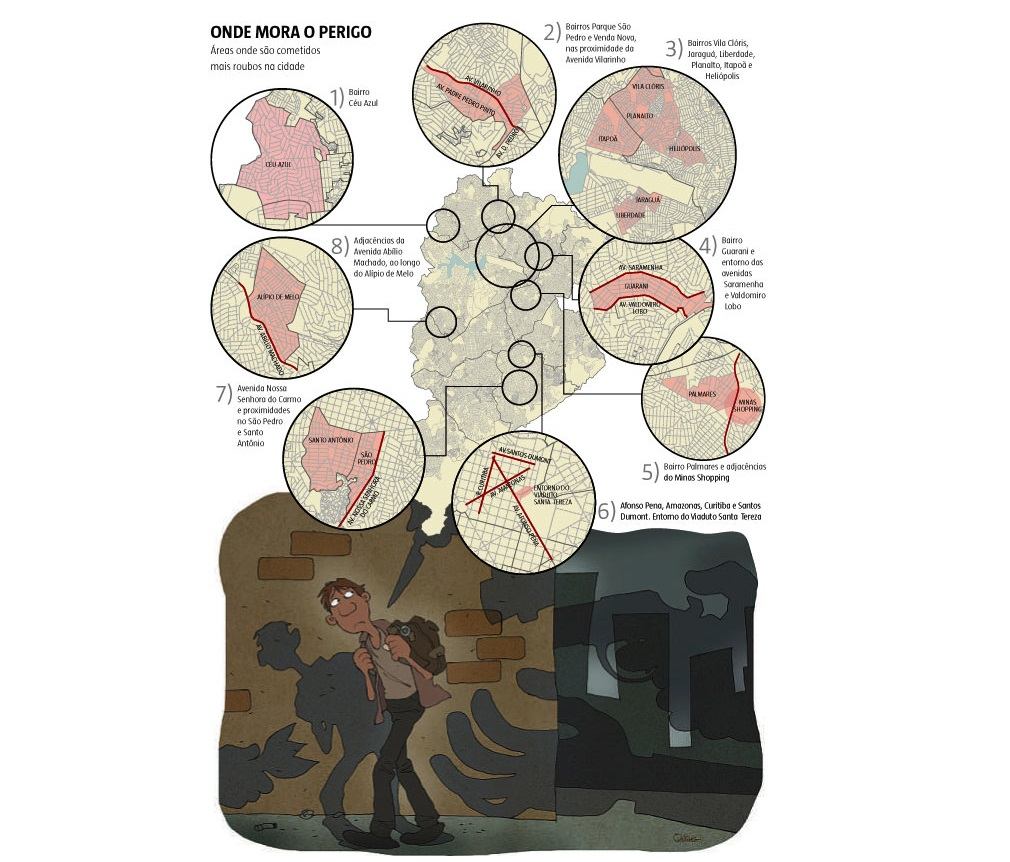

fonte: http://perimetralseguranca.com.br/blog/policia-mostra-rotas-dos-criminosos-em-belo-horizonte/

Como mencionado acima, o bairro Guarani é um dos mais perigosos de Belo Horizonte. Recorrentemente são registradas ocorrências de assaltos, roubos, agressões e outros crimes na região. A título exemplificativo, registram-se abaixo notícias correlatas em distintos veículos de comunicação:

* Jornal Hoje em Dia (19/02/2019): https://www.hojeemdia.com.br/horizontes/gerente-e-funcionários-de-banco-mantidos-como-reféns-em-bh-são-liberados-suspeito-é-preso-1.695309

* Jornal O Tempo (24/12/2019): https://www.otempo.com.br/cidades/assalto-a-carro-no-guarani-termina-com-perseguicao-policial-e-dois-detidos-1.2278250

* Jornal Estado de Minas (01/07/2020): https://www.em.com.br/app/noticia/gerais/2020/07/01/interna_gerais,1161807/homem-e-preso-em-bh-com-875-micropontos-de-lsd.shtml

* Globo-G1 (16/03/2021): https://g1.globo.com/mg/minas-gerais/noticia/2021/03/16/homem-e-preso-apos-cercar-entregadores-dos-correios-em-bh-e-pegar-encomenda-com-cartoes-bancarios-falsos.ghtml

Uma possível medida de segurança para combater o crime no bairro seria a instalação de cameras de vigilância nas ruas. Para isso, é necessário mapear os pontos ideais para instalar as câmeras, de modo a cobrir todas as ruas do bairro. Uma abordagem para esse problema evitando sobreposições de ruas a serem vigiadas seria por meio da cobertura mínima de vértices. Dessa forma, faz-se necessário mapear as esquinas e ruas do bairro. Para isso recorre-se ao aplicativo Google Map (https://www.google.com.br/maps/place/Guarani,+Belo+Horizonte+-+State+of+Minas+Gerais/@-19.8440583,-43.9318053,15z/). Sobre o mapa do bairro Guarani disponibilizado foram desenhados vértices (esquinas e cruzamentos) e arestas(ruas), obtendo-se o seguinte grafo:

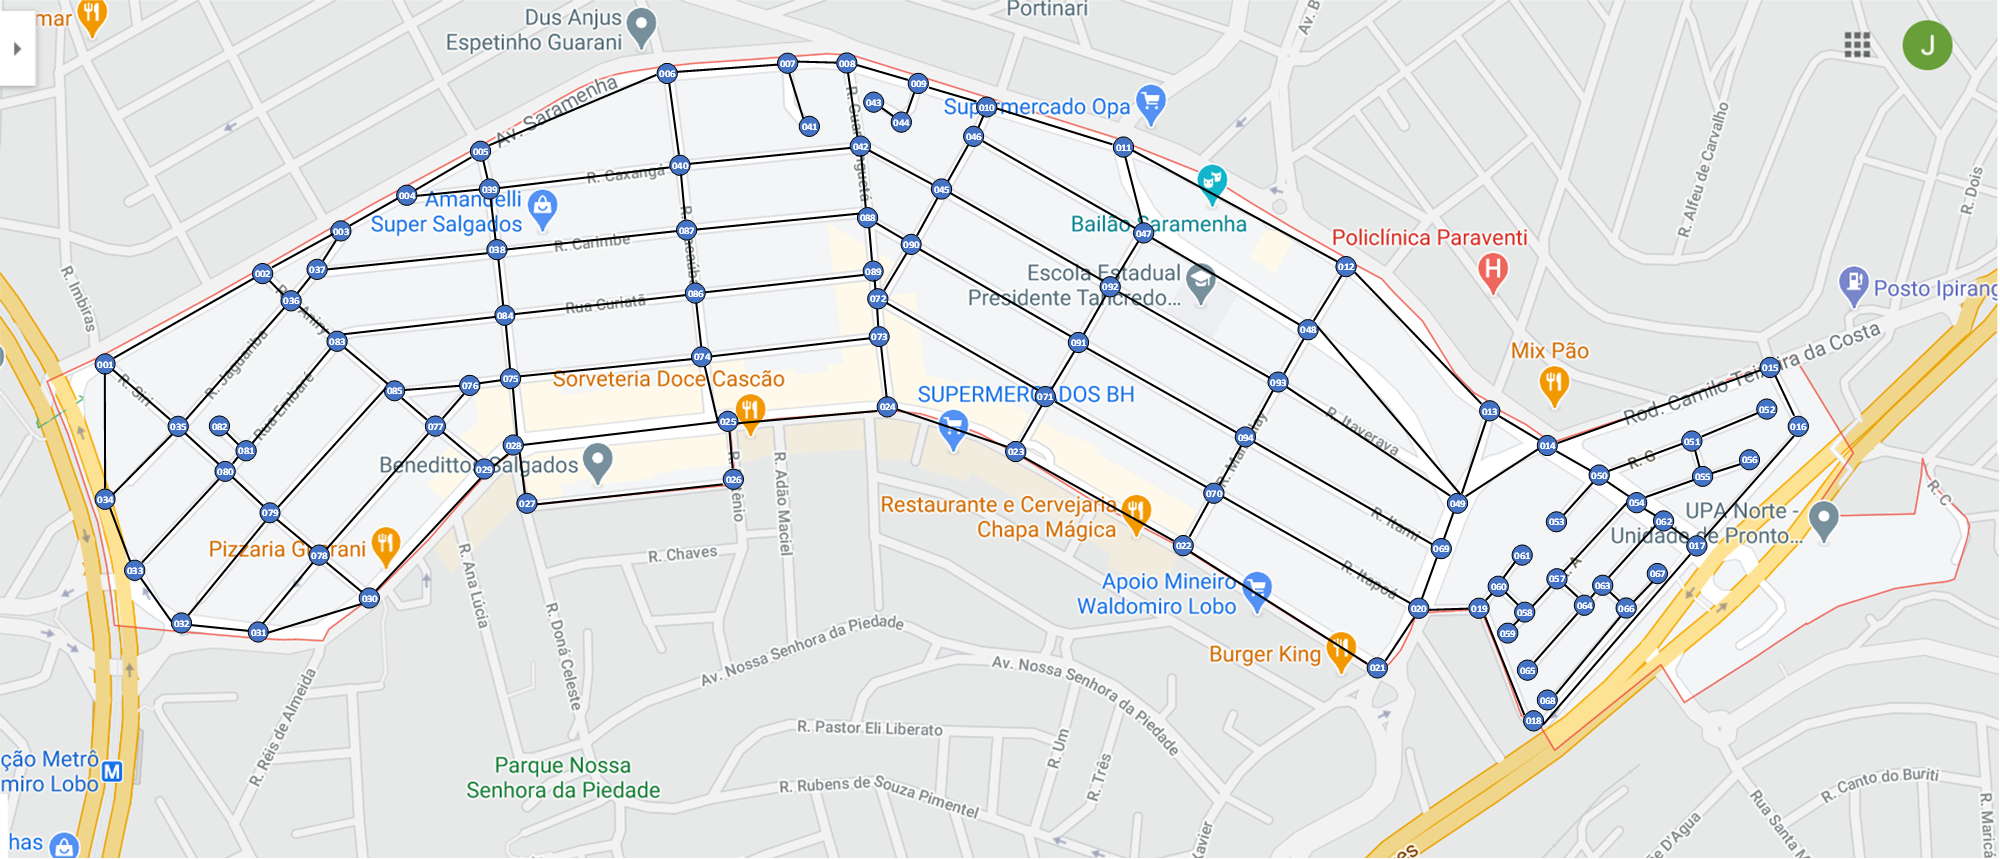

fonte: elaborado pelos autores

In [452]:
#Criando um grafo na biblioteca networkx com as esquinas/cruzamentos e ruas do bairro Guarani/MG
guarani = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12),
           (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21),
           (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 28), (28, 29), (29, 30),
           (30, 31), (31, 32), (32, 33), (33, 34), (1, 34), (1, 35), (34, 35), (35, 36), (2, 36), (36, 37),
           (3, 37), (37, 38), (38, 39), (4, 39), (5, 39), (39, 40), (6, 40), (7, 41), (40, 42), (8, 42),
           (9, 44), (43, 44), (42, 45), (45, 46), (10, 46), (46, 47), (11, 47), (47, 48), (12, 48),
           (48, 49), (13, 49), (14, 49), (14, 50), (50, 51), (51, 52), (50, 53), (50, 54), (54, 55),
           (51, 55), (55, 56), (54, 57), (57, 58), (58, 59), (58, 60), (19, 60), (60, 61), (54, 62),
           (17, 62), (62, 63), (63, 64), (57, 64), (64, 65), (63, 66), (66, 67), (66, 68), (49, 69),
           (20, 69), (20, 70), (22, 70), (70, 71), (23, 71), (71, 72), (72, 73), (24, 73), (73, 74),
           (25, 74), (25, 28), (74, 75), (28, 75), (75, 76), (76, 77), (29, 77), (77, 78), (30, 78),
           (31, 78), (78, 79), (32, 79), (79, 80), (33, 80), (35, 80), (80, 81), (81, 82), (81, 83),
           (36, 83), (83, 84), (38, 84), (75, 84), (76, 85), (83, 85), (79, 85), (77, 85), (84, 86),
           (74, 86), (86, 87), (38, 87), (40, 87), (87, 88), (42, 88), (88, 89), (86, 89), (72, 89),
           (88, 90), (72, 90), (45, 90), (90, 91), (71, 91), (91, 92), (45, 92), (47, 92), (92, 93),
           (48, 93), (93, 94), (91, 94), (70, 94), (49, 93), (69, 94)]
G = nx.Graph()
G.add_edges_from(guarani)
print('G = ({}, {})'.format(len(G.nodes), len(G.edges)))

G = (94, 145)


Assumindo que as câmeras de vigilância a serem instaladas possuem alcance suficiente para cobrir as aresta formadas, seria possível determinar os pontos ideias para sua instalação por meio da cobertura mínima de vértices (MVC) do grafo 'G' construído. No entanto, nota-se que este possui 94 vértices, de modo que o algoritmo exato aqui proposto não conseguiria obter uma solução ótima para o problema em tempo polinomial. Diante do exposto, recorre-se aos algoritmos HVX e HGA, buscando soluções ótimas - ou quase ótimas - em tempo factível.

In [528]:
HVX_med = []
n_sol = 100
for _ in range(n_sol):
    HVX_med.append(len(HVX(G).vertex_cover()))
HVX_stat = times_n_stats(HVX_med)
print('HVX (n = {} soluções)'.format(n_sol))
print('Média amostral: {:.2f} pontos'.format(HVX_stat[3]))
print('IC (95%): ({:.2f}, {:.2f})'.format(HVX_stat[6][0], HVX_stat[6][1]))

HVX (n = 100 soluções)
Média amostral: 54.10 pontos
IC (95%): (53.87, 54.33)


In [532]:
HGA_med = []
n_sol = 100
for _ in range(n_sol):
    HGA_med.append(len(HGA(G, pop = 50, gen = 10).mvc()))
HGA_stat = times_n_stats(HGA_med)
print('HGA (n = {} soluções)'.format(n_sol))
print('Média amostral: {:.2f} pontos'.format(HGA_stat[3]))
print('IC (95%): ({:.2f}, {:.2f})'.format(HGA_stat[6][0], HGA_stat[6][1]))

HGA (n = 100 soluções)
Média amostral: 50.19 pontos
IC (95%): (50.11, 50.27)


Constatou-se que, para uma amostra de 100 soluções, a média encontrada, para um nível de confiança de 95%, considerando uma distribuição normal, foi de 54 pontos (ou vértices) para o algoritmo HVX e 50 pontos para o algoritmo HGA. Nota-se que o intervalo de confiança calculado para HGA é muito pequeno, indicando que a solução encontrada é possívelmente um ótimo global. Outro fator que corrobora com essa afirmativa é a convergência do algoritmo para esse valor mesmo aumentando os parâmetros de tamanho da população e quantidade de gerações, como se observa a seguir:

In [545]:
for p, g in zip([25, 25, 50, 50, 100, 100], [10, 20, 10, 20, 10, 20]):
    print('HGA: (pop = {}, gen = {})'.format(p, g))
    ans = HGA(G, p, g).mvc(prt = True)
    print('solução:',len(ans), 'pontos')
    print()

HGA: (pop = 25, gen = 10)
Geração 1: 51
Geração 2: 51
Geração 3: 50
Geração 4: 50
Geração 5: 50
Geração 6: 50
Geração 7: 50
Geração 8: 50
Geração 9: 50
Geração 10: 50
solução: 50 pontos

HGA: (pop = 25, gen = 20)
Geração 1: 52
Geração 2: 51
Geração 3: 51
Geração 4: 51
Geração 5: 50
Geração 6: 50
Geração 7: 50
Geração 8: 50
Geração 9: 50
Geração 10: 50
Geração 11: 50
Geração 12: 50
Geração 13: 50
Geração 14: 50
Geração 15: 50
Geração 16: 50
Geração 17: 50
Geração 18: 50
Geração 19: 50
Geração 20: 50
solução: 50 pontos

HGA: (pop = 50, gen = 10)
Geração 1: 51
Geração 2: 51
Geração 3: 51
Geração 4: 50
Geração 5: 50
Geração 6: 50
Geração 7: 50
Geração 8: 50
Geração 9: 50
Geração 10: 50
solução: 50 pontos

HGA: (pop = 50, gen = 20)
Geração 1: 51
Geração 2: 51
Geração 3: 51
Geração 4: 51
Geração 5: 50
Geração 6: 50
Geração 7: 50
Geração 8: 50
Geração 9: 50
Geração 10: 50
Geração 11: 50
Geração 12: 50
Geração 13: 50
Geração 14: 50
Geração 15: 50
Geração 16: 50
Geração 17: 50
Geração 18: 50
Ge

Dessa forma, pode-se concluir que o algoritmo híbrido genético HGA é uma solução factível para o problema de cobertura mínima de vértices no bairro do Guarani - MG, retornando um ótimo - possivelmente global - de 50 pontos para instalação de câmeras de vigilância de modo a cobrir todas as suas ruas. A otimização é clara no presente exemplo, visto que o MVC encontrado é aproximadamente 1/3 das arestas do grafo e 1/2 de seus vértices. A figura abaixo ilustra os pontos (em verde) a serem instaladas as câmeras, de acordo com a solução encontrada pelo algoritmo HGA.

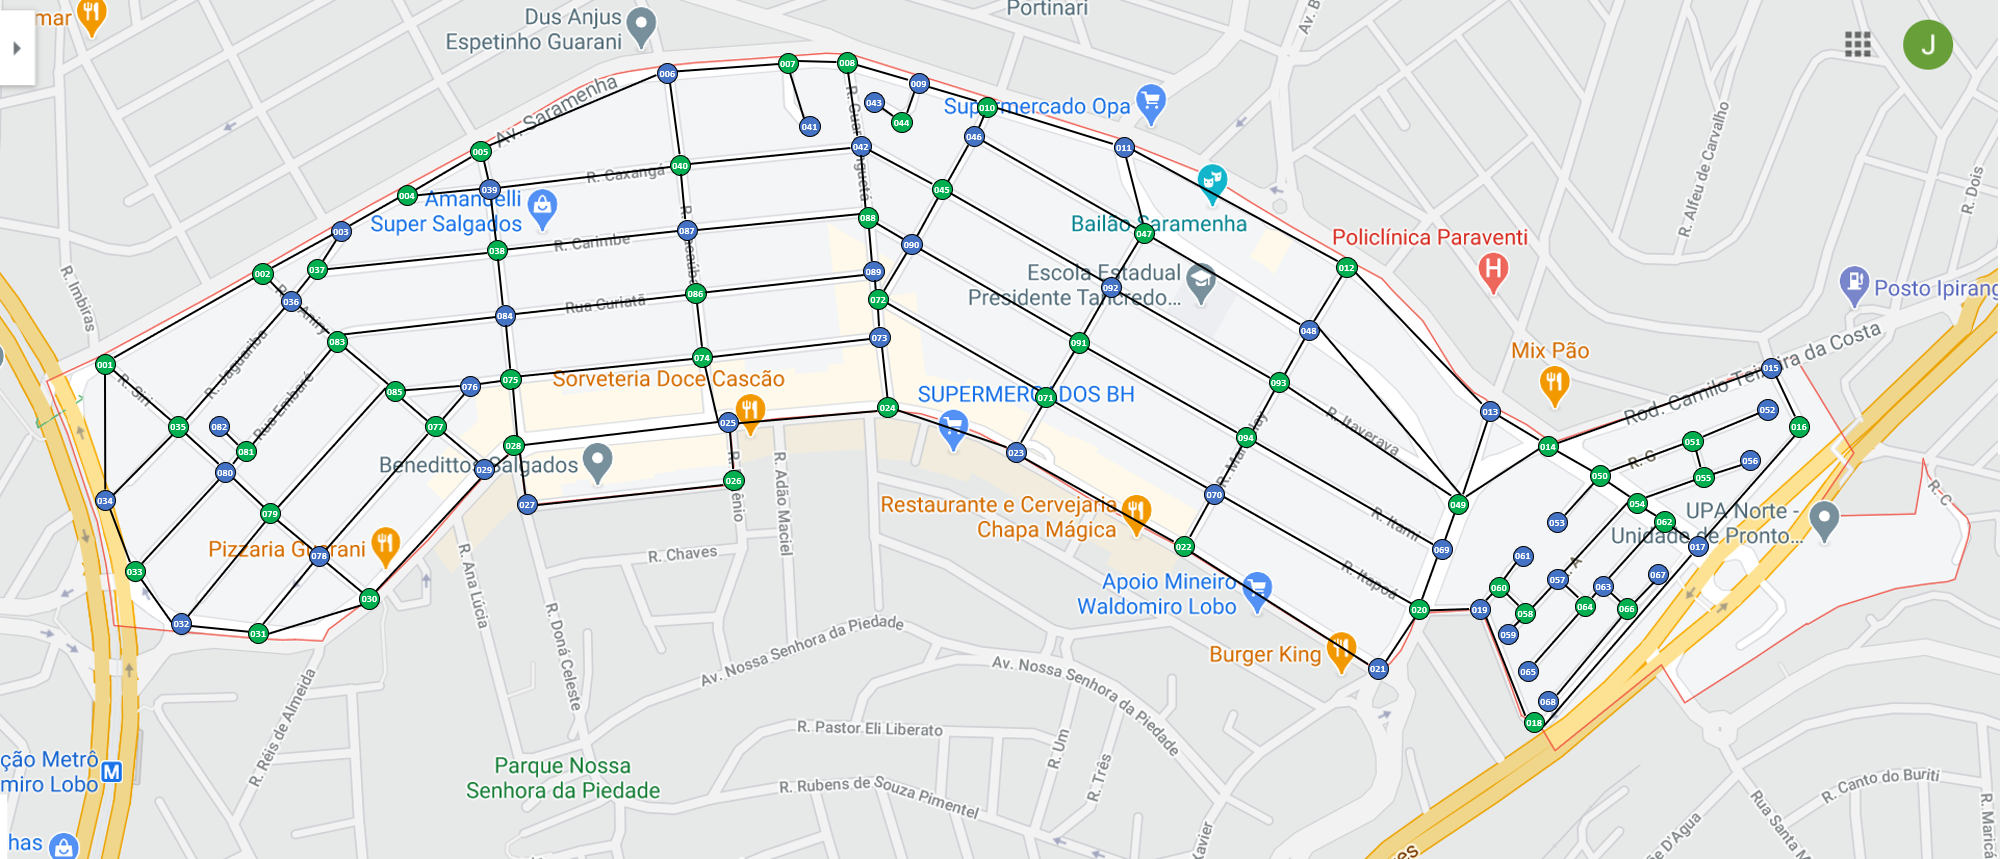

#### 6) Conclusão

Verificamos que o algoritmo exato implementado para o problema de cobertura mínima de vértices fornece soluções ótimas. Contudo, sua performance vai depender do tipo de grafo avaliado e do seu número de vértices, tornando-se infactível com poucas dezenas de nós. Visando contornar esse problema foram implementados algoritmos aproximados usando heurísticas (HVX) e meta-heurísticas (HGA), que se mostraram efetivos na obtenção de soluções ótimas ou quase ótimas em tempo polinomial. 

O algoritmo HVX converge rapidamente para uma solução quase ótima, tendendo, no entanto, a se assentar em ótimos locais. O algoritmo HGA, por sua vez, consegue convergir para o ótimo global, com o desempenho dependendo dos parâmetros de quantidade da população e número de gerações, bem como do grafo a ser inserido. Para grafos com grande quantidade de vértices, o HGA leva uma quantidade de tempo substancialmente maior do que o HVX para encontrar uma solução apenas um pouco melhor. Dessa forma, o algoritmo HVX se torna mais factível que o HGA a medida que a complexidade do grafo avaliado aumenta. 

Para aplicações mais simples, como o caso do bairro do Guarani, em Minas Gerais, com suas esquinas/cruzamentos e ruas representados por vértices e arestas, respectivamente, de um grafo G = (94, 145), a solução do algoritmo genético híbrido se mostrou efetiva, já que rapidamente retorna uma solução ótima - possivelmente um ótimo global - para o problema, ao passo que o algoritmo exato se mostrou infactível e o algoritmo HVX convergiu - ainda que de forma rápida - para ótimos locais.